## <font color=red> Reading data and creating required columns

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
data = pd.read_csv('ENB2012_data.csv')

In [29]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [30]:
data.shape

(768, 10)

## Adding column for overall load

In [31]:
data['overall_load'] = data['Y1'] + data['Y2']
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,overall_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


## Trend of overall load

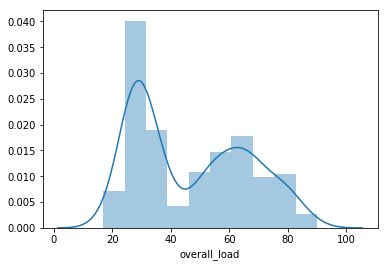

In [32]:
sns.distplot(data['overall_load'])

## Adding column for classes for efficiency

In [33]:
data['efficiency'] = np.where(data['overall_load']<35, 'Low', np.where(data['overall_load']<65, 'Average', 'High'))
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,overall_load,efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [34]:
data.shape

(768, 12)

## <font color=red> Creating different datasets for different Y variables

## Data set for heating load

In [35]:
data_heat = data.drop(columns=['Y2','overall_load','efficiency'])

In [36]:
data_heat.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [37]:
data_heat.shape

(768, 9)

## Data set for cooling load

In [38]:
data_cool = data.drop(columns=['Y1','overall_load','efficiency'])
data_cool.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [39]:
data_cool.shape

(768, 9)

## Data set for efficiency classification

In [40]:
data_eff = data.drop(columns=['Y1','Y2','overall_load'])
data_eff.head()

,X1,X2,X3,X4,X5,X6,X7,X8,efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average


## <font color=red> Models for predicting heating load

## Data preprocessing

In [41]:
X = data_heat.drop(columns=['Y1'])
y= data_heat['Y1']

In [42]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

In [43]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Regressor

In [44]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 8s 14ms/step - loss: 586.2401 - mean_squared_error: 586.2401
Epoch 2/100
537/537 [==============================] - 0s 575us/step - loss: 583.8661 - mean_squared_error: 583.8661
Epoch 3/100
537/537 [==============================] - 0s 584us/step - loss: 581.5207 - mean_squared_error: 581.5207
Epoch 4/100
537/537 [==============================] - 0s 542us/step - loss: 579.1870 - mean_squared_error: 579.1870
Epoch 5/100
537/537 [==============================] - 0s 720us/step - loss: 576.8466 - mean_squared_error: 576.8466
Epoch 6/100
537/537 [==============================] - 0s 702us/step - loss: 574.5479 - mean_squared_error: 574.5479
Epoch 7/100
537/537 [==============================] - 0s 567us/step - loss: 572.2128 - mean_squared_error: 572.2128
Epoch 8/100
537/537 [==============================] - 0s 579us/step - loss: 569.9168 - mean_squared_error: 569.9168
Epoch 9/100
537/537 [==============================] - 0s 604us/s

In [45]:
from sklearn.metrics import r2_score

y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: -2.75
Test r2: -3.05


In [46]:
## Neural Network Regressor with Parameter tuning
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
def build_reg(optimizer):
    nn_reg = Sequential()
    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
    nn_reg.add(Dense(1, activation='linear'))
    
    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return nn_reg

nn_reg = KerasRegressor(build_fn=build_reg)

param_grid = {'batch_size': [9,16,25],
          'epochs': [50,100,150],
          'optimizer': ['rmsprop','adam']}

nn_reg_grid_heat = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

nn_reg_grid_heat.fit(X_train, y_train)

Epoch 1/50
469/469 [==============================] - 7s 15ms/step - loss: 587.8395 - mean_squared_error: 587.8395
Epoch 2/50
469/469 [==============================] - 0s 537us/step - loss: 578.9156 - mean_squared_error: 578.9156
Epoch 3/50
469/469 [==============================] - 0s 540us/step - loss: 566.0489 - mean_squared_error: 566.0489
Epoch 4/50
469/469 [==============================] - 0s 536us/step - loss: 549.2640 - mean_squared_error: 549.2640
Epoch 5/50
469/469 [==============================] - 0s 537us/step - loss: 527.8585 - mean_squared_error: 527.8585
Epoch 6/50
469/469 [==============================] - 0s 555us/step - loss: 501.6500 - mean_squared_error: 501.6500
Epoch 7/50
469/469 [==============================] - 0s 663us/step - loss: 471.2211 - mean_squared_error: 471.2211
Epoch 8/50
469/469 [==============================] - 0s 689us/step - loss: 436.2710 - mean_squared_error: 436.2710
Epoch 9/50
469/469 [==============================] - 0s 682us/step - los

470/470 [==============================] - 0s 747us/step - loss: 10.0261 - mean_squared_error: 10.0261
Epoch 44/50
470/470 [==============================] - 0s 752us/step - loss: 9.9185 - mean_squared_error: 9.9185
Epoch 45/50
470/470 [==============================] - 0s 742us/step - loss: 9.8724 - mean_squared_error: 9.8724
Epoch 46/50
470/470 [==============================] - 0s 749us/step - loss: 9.8163 - mean_squared_error: 9.8163
Epoch 47/50
470/470 [==============================] - 0s 736us/step - loss: 9.7530 - mean_squared_error: 9.7530
Epoch 48/50
470/470 [==============================] - 0s 743us/step - loss: 9.7066 - mean_squared_error: 9.7066
Epoch 49/50
470/470 [==============================] - 0s 787us/step - loss: 9.6438 - mean_squared_error: 9.6438
Epoch 50/50
470/470 [==============================] - 0s 812us/step - loss: 9.6524 - mean_squared_error: 9.6524
Epoch 1/50
470/470 [==============================] - 7s 16ms/step - loss: 585.4041 - mean_squared_error: 

470/470 [==============================] - 0s 767us/step - loss: 11.0303 - mean_squared_error: 11.0303
Epoch 36/50
470/470 [==============================] - 0s 754us/step - loss: 10.9136 - mean_squared_error: 10.9136
Epoch 37/50
470/470 [==============================] - 0s 750us/step - loss: 10.7812 - mean_squared_error: 10.7812
Epoch 38/50
470/470 [==============================] - 0s 769us/step - loss: 10.6945 - mean_squared_error: 10.6945
Epoch 39/50
470/470 [==============================] - 0s 753us/step - loss: 10.6382 - mean_squared_error: 10.6382
Epoch 40/50
470/470 [==============================] - 0s 774us/step - loss: 10.6072 - mean_squared_error: 10.6072
Epoch 41/50
470/470 [==============================] - 0s 753us/step - loss: 10.4934 - mean_squared_error: 10.4934
Epoch 42/50
470/470 [==============================] - 0s 762us/step - loss: 10.4337 - mean_squared_error: 10.4337
Epoch 43/50
470/470 [==============================] - 0s 767us/step - loss: 10.3928 - mean_

469/469 [==============================] - 0s 444us/step - loss: 19.6341 - mean_squared_error: 19.6341
Epoch 27/50
469/469 [==============================] - 0s 647us/step - loss: 18.4662 - mean_squared_error: 18.4662
Epoch 28/50
469/469 [==============================] - 0s 828us/step - loss: 17.5144 - mean_squared_error: 17.5144
Epoch 29/50
469/469 [==============================] - 0s 519us/step - loss: 16.6879 - mean_squared_error: 16.6879
Epoch 30/50
469/469 [==============================] - 0s 554us/step - loss: 15.9986 - mean_squared_error: 15.9986
Epoch 31/50
469/469 [==============================] - 0s 555us/step - loss: 15.4286 - mean_squared_error: 15.4286
Epoch 32/50
469/469 [==============================] - 0s 793us/step - loss: 14.8779 - mean_squared_error: 14.8779
Epoch 33/50
469/469 [==============================] - 0s 738us/step - loss: 14.5303 - mean_squared_error: 14.5303
Epoch 34/50
469/469 [==============================] - 0s 659us/step - loss: 14.1041 - mean_

470/470 [==============================] - 0s 722us/step - loss: 62.9449 - mean_squared_error: 62.9449
Epoch 19/50
470/470 [==============================] - 0s 726us/step - loss: 58.9930 - mean_squared_error: 58.9930
Epoch 20/50
470/470 [==============================] - 0s 644us/step - loss: 55.4709 - mean_squared_error: 55.4709
Epoch 21/50
470/470 [==============================] - 0s 733us/step - loss: 52.1592 - mean_squared_error: 52.1592
Epoch 22/50
470/470 [==============================] - 0s 683us/step - loss: 49.0348 - mean_squared_error: 49.0348
Epoch 23/50
470/470 [==============================] - 0s 935us/step - loss: 46.1374 - mean_squared_error: 46.1374
Epoch 24/50
470/470 [==============================] - 0s 702us/step - loss: 43.2935 - mean_squared_error: 43.2935
Epoch 25/50
470/470 [==============================] - 0s 667us/step - loss: 40.6451 - mean_squared_error: 40.6451
Epoch 26/50
470/470 [==============================] - 0s 740us/step - loss: 38.1969 - mean_

470/470 [==============================] - 0s 974us/step - loss: 46.8226 - mean_squared_error: 46.8226
Epoch 12/50
470/470 [==============================] - 1s 1ms/step - loss: 40.8489 - mean_squared_error: 40.8489
Epoch 13/50
470/470 [==============================] - 1s 1ms/step - loss: 35.7524 - mean_squared_error: 35.7524
Epoch 14/50
470/470 [==============================] - 1s 1ms/step - loss: 31.3287 - mean_squared_error: 31.3287
Epoch 15/50
470/470 [==============================] - 1s 1ms/step - loss: 27.5555 - mean_squared_error: 27.5555
Epoch 16/50
470/470 [==============================] - 1s 1ms/step - loss: 24.3742 - mean_squared_error: 24.3742
Epoch 17/50
470/470 [==============================] - 1s 1ms/step - loss: 21.7668 - mean_squared_error: 21.7668
Epoch 18/50
470/470 [==============================] - 1s 1ms/step - loss: 19.6414 - mean_squared_error: 19.6414
Epoch 19/50
470/470 [==============================] - 1s 1ms/step - loss: 17.9867 - mean_squared_error: 1

469/469 [==============================] - 1s 1ms/step - loss: 10.0026 - mean_squared_error: 10.0026
Epoch 55/100
469/469 [==============================] - 1s 1ms/step - loss: 10.0192 - mean_squared_error: 10.0192
Epoch 56/100
469/469 [==============================] - 1s 1ms/step - loss: 9.9896 - mean_squared_error: 9.9896
Epoch 57/100
469/469 [==============================] - 1s 1ms/step - loss: 9.8766 - mean_squared_error: 9.8766
Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 9.9440 - mean_squared_error: 9.9440
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 9.8975 - mean_squared_error: 9.8975
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 9.9112 - mean_squared_error: 9.9112
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 9.9350 - mean_squared_error: 9.9350
Epoch 62/100
469/469 [==============================] - 1s 1ms/step - loss: 9.8730 - mean_squared_error: 9.8730
E

470/470 [==============================] - 1s 1ms/step - loss: 116.1153 - mean_squared_error: 116.1153
Epoch 27/100
470/470 [==============================] - 1s 1ms/step - loss: 101.5072 - mean_squared_error: 101.5072
Epoch 28/100
470/470 [==============================] - 1s 1ms/step - loss: 90.5664 - mean_squared_error: 90.5664
Epoch 29/100
470/470 [==============================] - 1s 1ms/step - loss: 83.4189 - mean_squared_error: 83.4189
Epoch 30/100
470/470 [==============================] - 1s 1ms/step - loss: 78.4676 - mean_squared_error: 78.4676
Epoch 31/100
470/470 [==============================] - 1s 1ms/step - loss: 74.8995 - mean_squared_error: 74.8995
Epoch 32/100
470/470 [==============================] - 1s 1ms/step - loss: 71.9308 - mean_squared_error: 71.9308
Epoch 33/100
470/470 [==============================] - 1s 1ms/step - loss: 69.4261 - mean_squared_error: 69.4261
Epoch 34/100
470/470 [==============================] - 1s 1ms/step - loss: 67.0341 - mean_square

470/470 [==============================] - 1s 1ms/step - loss: 9.8808 - mean_squared_error: 9.8808
Epoch 69/100
470/470 [==============================] - 1s 1ms/step - loss: 9.8325 - mean_squared_error: 9.8325
Epoch 70/100
470/470 [==============================] - 1s 1ms/step - loss: 9.7815 - mean_squared_error: 9.7815
Epoch 71/100
470/470 [==============================] - 1s 1ms/step - loss: 9.7434 - mean_squared_error: 9.7434
Epoch 72/100
470/470 [==============================] - 1s 1ms/step - loss: 9.6925 - mean_squared_error: 9.6925
Epoch 73/100
470/470 [==============================] - 0s 952us/step - loss: 9.7014 - mean_squared_error: 9.7014
Epoch 74/100
470/470 [==============================] - 1s 1ms/step - loss: 9.6694 - mean_squared_error: 9.6694
Epoch 75/100
470/470 [==============================] - 0s 1ms/step - loss: 9.6302 - mean_squared_error: 9.6302
Epoch 76/100
470/470 [==============================] - 0s 779us/step - loss: 9.6128 - mean_squared_error: 9.6128
E

470/470 [==============================] - 0s 965us/step - loss: 87.0964 - mean_squared_error: 87.0964
Epoch 12/100
470/470 [==============================] - 1s 1ms/step - loss: 73.3370 - mean_squared_error: 73.3370
Epoch 13/100
470/470 [==============================] - 0s 1ms/step - loss: 65.5539 - mean_squared_error: 65.5539
Epoch 14/100
470/470 [==============================] - 1s 1ms/step - loss: 59.2511 - mean_squared_error: 59.2511
Epoch 15/100
470/470 [==============================] - 0s 1ms/step - loss: 53.3705 - mean_squared_error: 53.3705
Epoch 16/100
470/470 [==============================] - 1s 1ms/step - loss: 47.2828 - mean_squared_error: 47.2828
Epoch 17/100
470/470 [==============================] - 1s 1ms/step - loss: 41.7304 - mean_squared_error: 41.7304
Epoch 18/100
470/470 [==============================] - 0s 860us/step - loss: 36.4709 - mean_squared_error: 36.4709
Epoch 19/100
470/470 [==============================] - 0s 1ms/step - loss: 31.8657 - mean_square

470/470 [==============================] - 0s 970us/step - loss: 10.3693 - mean_squared_error: 10.3693
Epoch 54/100
470/470 [==============================] - 0s 1ms/step - loss: 10.3147 - mean_squared_error: 10.3147
Epoch 55/100
470/470 [==============================] - 1s 1ms/step - loss: 10.3095 - mean_squared_error: 10.3095
Epoch 56/100
470/470 [==============================] - 1s 1ms/step - loss: 10.2692 - mean_squared_error: 10.2692
Epoch 57/100
470/470 [==============================] - 1s 1ms/step - loss: 10.2339 - mean_squared_error: 10.2339
Epoch 58/100
470/470 [==============================] - 1s 1ms/step - loss: 10.1896 - mean_squared_error: 10.1896
Epoch 59/100
470/470 [==============================] - 1s 1ms/step - loss: 10.1934 - mean_squared_error: 10.1934
Epoch 60/100
470/470 [==============================] - 1s 1ms/step - loss: 10.1658 - mean_squared_error: 10.1658
Epoch 61/100
470/470 [==============================] - 1s 1ms/step - loss: 10.1280 - mean_squared_

470/470 [==============================] - 0s 983us/step - loss: 9.1473 - mean_squared_error: 9.1473
Epoch 97/100
470/470 [==============================] - 0s 1ms/step - loss: 9.1641 - mean_squared_error: 9.1641
Epoch 98/100
470/470 [==============================] - 0s 965us/step - loss: 9.1630 - mean_squared_error: 9.1630
Epoch 99/100
470/470 [==============================] - 1s 1ms/step - loss: 9.1621 - mean_squared_error: 9.1621
Epoch 100/100
470/470 [==============================] - 0s 1ms/step - loss: 9.1392 - mean_squared_error: 9.1392
Epoch 1/100
470/470 [==============================] - 8s 18ms/step - loss: 601.2120 - mean_squared_error: 601.2120
Epoch 2/100
470/470 [==============================] - 0s 547us/step - loss: 590.5930 - mean_squared_error: 590.5930
Epoch 3/100
470/470 [==============================] - 0s 563us/step - loss: 572.3282 - mean_squared_error: 572.3282
Epoch 4/100
470/470 [==============================] - 0s 635us/step - loss: 546.1629 - mean_squar

470/470 [==============================] - 0s 599us/step - loss: 10.6064 - mean_squared_error: 10.6064
Epoch 68/100
470/470 [==============================] - 0s 853us/step - loss: 10.5703 - mean_squared_error: 10.5703
Epoch 69/100
470/470 [==============================] - 0s 1ms/step - loss: 10.5289 - mean_squared_error: 10.5289
Epoch 70/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5106 - mean_squared_error: 10.5106
Epoch 71/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5079 - mean_squared_error: 10.5079
Epoch 72/100
470/470 [==============================] - 1s 1ms/step - loss: 10.4984 - mean_squared_error: 10.4984
Epoch 73/100
470/470 [==============================] - 1s 1ms/step - loss: 10.4854 - mean_squared_error: 10.4854
Epoch 74/100
470/470 [==============================] - 0s 1ms/step - loss: 10.4803 - mean_squared_error: 10.4803
Epoch 75/100
470/470 [==============================] - 0s 874us/step - loss: 10.4567 - mean_squa

470/470 [==============================] - 0s 1ms/step - loss: 141.3560 - mean_squared_error: 141.3560
Epoch 10/100
470/470 [==============================] - 1s 1ms/step - loss: 99.7816 - mean_squared_error: 99.7816
Epoch 11/100
470/470 [==============================] - 1s 1ms/step - loss: 80.3514 - mean_squared_error: 80.3514
Epoch 12/100
470/470 [==============================] - 0s 933us/step - loss: 70.3040 - mean_squared_error: 70.3040
Epoch 13/100
470/470 [==============================] - 1s 1ms/step - loss: 63.9953 - mean_squared_error: 63.9953
Epoch 14/100
470/470 [==============================] - 1s 1ms/step - loss: 58.8381 - mean_squared_error: 58.8381
Epoch 15/100
470/470 [==============================] - 1s 1ms/step - loss: 54.0643 - mean_squared_error: 54.0643
Epoch 16/100
470/470 [==============================] - 1s 1ms/step - loss: 49.7129 - mean_squared_error: 49.7129
Epoch 17/100
470/470 [==============================] - 1s 1ms/step - loss: 45.7681 - mean_square

470/470 [==============================] - 1s 1ms/step - loss: 10.1273 - mean_squared_error: 10.1273
Epoch 52/100
470/470 [==============================] - 1s 1ms/step - loss: 10.0866 - mean_squared_error: 10.0866
Epoch 53/100
470/470 [==============================] - 0s 1ms/step - loss: 9.9630 - mean_squared_error: 9.9630
Epoch 54/100
470/470 [==============================] - 0s 769us/step - loss: 9.9154 - mean_squared_error: 9.9154
Epoch 55/100
470/470 [==============================] - 1s 1ms/step - loss: 9.8433 - mean_squared_error: 9.8433
Epoch 56/100
470/470 [==============================] - 0s 735us/step - loss: 9.8200 - mean_squared_error: 9.8200
Epoch 57/100
470/470 [==============================] - 0s 740us/step - loss: 9.7636 - mean_squared_error: 9.7636
Epoch 58/100
470/470 [==============================] - 0s 747us/step - loss: 9.6890 - mean_squared_error: 9.6890
Epoch 59/100
470/470 [==============================] - 0s 779us/step - loss: 9.6984 - mean_squared_error

470/470 [==============================] - 1s 1ms/step - loss: 14.0192 - mean_squared_error: 14.0192
Epoch 24/100
470/470 [==============================] - 1s 1ms/step - loss: 13.5806 - mean_squared_error: 13.5806
Epoch 25/100
470/470 [==============================] - 1s 1ms/step - loss: 13.1773 - mean_squared_error: 13.1773
Epoch 26/100
470/470 [==============================] - 1s 1ms/step - loss: 12.8606 - mean_squared_error: 12.8606
Epoch 27/100
470/470 [==============================] - 1s 1ms/step - loss: 12.5647 - mean_squared_error: 12.5647
Epoch 28/100
470/470 [==============================] - 1s 1ms/step - loss: 12.3028 - mean_squared_error: 12.3028
Epoch 29/100
470/470 [==============================] - 1s 1ms/step - loss: 12.0523 - mean_squared_error: 12.0523
Epoch 30/100
470/470 [==============================] - 1s 1ms/step - loss: 11.8259 - mean_squared_error: 11.8259
Epoch 31/100
470/470 [==============================] - 1s 1ms/step - loss: 11.6225 - mean_squared_er

470/470 [==============================] - 1s 1ms/step - loss: 10.6290 - mean_squared_error: 10.6290
Epoch 67/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5940 - mean_squared_error: 10.5940
Epoch 68/100
470/470 [==============================] - 1s 1ms/step - loss: 10.6295 - mean_squared_error: 10.6295
Epoch 69/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5287 - mean_squared_error: 10.5287
Epoch 70/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5657 - mean_squared_error: 10.5657
Epoch 71/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5387 - mean_squared_error: 10.5387
Epoch 72/100
470/470 [==============================] - 1s 1ms/step - loss: 10.5662 - mean_squared_error: 10.5662
Epoch 73/100
470/470 [==============================] - 0s 1ms/step - loss: 10.4889 - mean_squared_error: 10.4889
Epoch 74/100
470/470 [==============================] - 1s 1ms/step - loss: 10.4422 - mean_squared_er

Epoch 9/100
470/470 [==============================] - 1s 1ms/step - loss: 111.8461 - mean_squared_error: 111.8461
Epoch 10/100
470/470 [==============================] - 1s 1ms/step - loss: 87.7445 - mean_squared_error: 87.7445
Epoch 11/100
470/470 [==============================] - 0s 923us/step - loss: 75.7623 - mean_squared_error: 75.7623
Epoch 12/100
470/470 [==============================] - 0s 729us/step - loss: 67.9830 - mean_squared_error: 67.9830
Epoch 13/100
470/470 [==============================] - 0s 615us/step - loss: 61.6134 - mean_squared_error: 61.6134
Epoch 14/100
470/470 [==============================] - 0s 626us/step - loss: 56.1548 - mean_squared_error: 56.1548
Epoch 15/100
470/470 [==============================] - 0s 603us/step - loss: 51.1747 - mean_squared_error: 51.1747
Epoch 16/100
470/470 [==============================] - 0s 606us/step - loss: 46.4924 - mean_squared_error: 46.4924
Epoch 17/100
470/470 [==============================] - 0s 629us/step - los

470/470 [==============================] - 0s 787us/step - loss: 8.4262 - mean_squared_error: 8.4262
Epoch 53/100
470/470 [==============================] - 0s 719us/step - loss: 8.3498 - mean_squared_error: 8.3498
Epoch 54/100
470/470 [==============================] - 1s 1ms/step - loss: 8.2743 - mean_squared_error: 8.2743
Epoch 55/100
470/470 [==============================] - 1s 1ms/step - loss: 8.2746 - mean_squared_error: 8.2746
Epoch 56/100
470/470 [==============================] - 1s 1ms/step - loss: 8.1799 - mean_squared_error: 8.1799
Epoch 57/100
470/470 [==============================] - 1s 1ms/step - loss: 8.1732 - mean_squared_error: 8.1732
Epoch 58/100
470/470 [==============================] - 1s 1ms/step - loss: 8.1596 - mean_squared_error: 8.1596
Epoch 59/100
470/470 [==============================] - 1s 1ms/step - loss: 8.1044 - mean_squared_error: 8.1044
Epoch 60/100
470/470 [==============================] - 1s 1ms/step - loss: 8.1539 - mean_squared_error: 8.1539
E

469/469 [==============================] - 0s 1ms/step - loss: 9.9623 - mean_squared_error: 9.9623
Epoch 96/150
469/469 [==============================] - 1s 1ms/step - loss: 9.9175 - mean_squared_error: 9.9175
Epoch 97/150
469/469 [==============================] - 1s 1ms/step - loss: 9.9057 - mean_squared_error: 9.9057
Epoch 98/150
469/469 [==============================] - 1s 1ms/step - loss: 9.8648 - mean_squared_error: 9.8648
Epoch 99/150
469/469 [==============================] - 1s 1ms/step - loss: 9.8880 - mean_squared_error: 9.8880
Epoch 100/150
469/469 [==============================] - 1s 1ms/step - loss: 9.8682 - mean_squared_error: 9.8682
Epoch 101/150
469/469 [==============================] - 0s 726us/step - loss: 9.8714 - mean_squared_error: 9.8714
Epoch 102/150
469/469 [==============================] - 0s 887us/step - loss: 9.8506 - mean_squared_error: 9.8506
Epoch 103/150
469/469 [==============================] - 0s 1ms/step - loss: 9.8569 - mean_squared_error: 9.85

470/470 [==============================] - 1s 1ms/step - loss: 9.9416 - mean_squared_error: 9.9416
Epoch 89/150
470/470 [==============================] - 1s 1ms/step - loss: 9.9247 - mean_squared_error: 9.9247
Epoch 90/150
470/470 [==============================] - 1s 1ms/step - loss: 9.9007 - mean_squared_error: 9.9007
Epoch 91/150
470/470 [==============================] - 1s 1ms/step - loss: 9.9095 - mean_squared_error: 9.9095
Epoch 92/150
470/470 [==============================] - 0s 1ms/step - loss: 9.9319 - mean_squared_error: 9.9319
Epoch 93/150
470/470 [==============================] - 0s 928us/step - loss: 9.8668 - mean_squared_error: 9.8668
Epoch 94/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8654 - mean_squared_error: 9.8654
Epoch 95/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8991 - mean_squared_error: 9.8991
Epoch 96/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8742 - mean_squared_error: 9.8742
Epo

Epoch 82/150
470/470 [==============================] - 0s 640us/step - loss: 9.0723 - mean_squared_error: 9.0723
Epoch 83/150
470/470 [==============================] - 0s 1ms/step - loss: 9.0757 - mean_squared_error: 9.0757
Epoch 84/150
470/470 [==============================] - 1s 1ms/step - loss: 9.0674 - mean_squared_error: 9.0674
Epoch 85/150
470/470 [==============================] - 1s 1ms/step - loss: 9.0772 - mean_squared_error: 9.0772
Epoch 86/150
470/470 [==============================] - 0s 1ms/step - loss: 9.0529 - mean_squared_error: 9.0529
Epoch 87/150
470/470 [==============================] - 0s 845us/step - loss: 9.0565 - mean_squared_error: 9.0565
Epoch 88/150
470/470 [==============================] - 0s 993us/step - loss: 9.0140 - mean_squared_error: 9.0140
Epoch 89/150
470/470 [==============================] - 1s 1ms/step - loss: 9.0169 - mean_squared_error: 9.0169
Epoch 90/150
470/470 [==============================] - 1s 2ms/step - loss: 9.0315 - mean_squared_

470/470 [==============================] - 0s 943us/step - loss: 453.0430 - mean_squared_error: 453.0430
Epoch 5/150
470/470 [==============================] - 1s 1ms/step - loss: 388.3994 - mean_squared_error: 388.3994
Epoch 6/150
470/470 [==============================] - 1s 1ms/step - loss: 313.4454 - mean_squared_error: 313.4454
Epoch 7/150
470/470 [==============================] - 1s 1ms/step - loss: 238.0669 - mean_squared_error: 238.0669
Epoch 8/150
470/470 [==============================] - 1s 1ms/step - loss: 168.7741 - mean_squared_error: 168.7741
Epoch 9/150
470/470 [==============================] - 1s 1ms/step - loss: 120.1703 - mean_squared_error: 120.1703
Epoch 10/150
470/470 [==============================] - 1s 1ms/step - loss: 88.5036 - mean_squared_error: 88.5036
Epoch 11/150
470/470 [==============================] - 1s 1ms/step - loss: 72.9876 - mean_squared_error: 72.9876
Epoch 12/150
470/470 [==============================] - 1s 1ms/step - loss: 63.8733 - mean_s

470/470 [==============================] - 1s 1ms/step - loss: 9.1698 - mean_squared_error: 9.1698
Epoch 148/150
470/470 [==============================] - 1s 1ms/step - loss: 9.1748 - mean_squared_error: 9.1748
Epoch 149/150
470/470 [==============================] - 1s 1ms/step - loss: 9.1563 - mean_squared_error: 9.1563
Epoch 150/150
470/470 [==============================] - 1s 1ms/step - loss: 9.2030 - mean_squared_error: 9.2030
Epoch 1/150
470/470 [==============================] - 9s 19ms/step - loss: 571.1339 - mean_squared_error: 571.1339
Epoch 2/150
470/470 [==============================] - 0s 605us/step - loss: 566.0087 - mean_squared_error: 566.0087
Epoch 3/150
470/470 [==============================] - 0s 613us/step - loss: 557.7317 - mean_squared_error: 557.7317
Epoch 4/150
470/470 [==============================] - 0s 607us/step - loss: 545.7640 - mean_squared_error: 545.7640
Epoch 5/150
470/470 [==============================] - 0s 608us/step - loss: 529.5012 - mean_sq

Epoch 68/150
470/470 [==============================] - 0s 667us/step - loss: 10.9590 - mean_squared_error: 10.9590
Epoch 69/150
470/470 [==============================] - 0s 721us/step - loss: 10.9249 - mean_squared_error: 10.9249
Epoch 70/150
470/470 [==============================] - 0s 753us/step - loss: 10.8854 - mean_squared_error: 10.8854
Epoch 71/150
470/470 [==============================] - 0s 682us/step - loss: 10.8837 - mean_squared_error: 10.8837
Epoch 72/150
470/470 [==============================] - 0s 728us/step - loss: 10.7983 - mean_squared_error: 10.7983
Epoch 73/150
470/470 [==============================] - 0s 899us/step - loss: 10.7892 - mean_squared_error: 10.7892
Epoch 74/150
470/470 [==============================] - 0s 858us/step - loss: 10.7726 - mean_squared_error: 10.7726
Epoch 75/150
470/470 [==============================] - 0s 658us/step - loss: 10.7356 - mean_squared_error: 10.7356
Epoch 76/150
470/470 [==============================] - 0s 702us/step - 

470/470 [==============================] - 1s 1ms/step - loss: 12.0840 - mean_squared_error: 12.0840
Epoch 60/150
470/470 [==============================] - 1s 1ms/step - loss: 11.9023 - mean_squared_error: 11.9023
Epoch 61/150
470/470 [==============================] - 1s 1ms/step - loss: 11.8207 - mean_squared_error: 11.8207
Epoch 62/150
470/470 [==============================] - 1s 1ms/step - loss: 11.6953 - mean_squared_error: 11.6953
Epoch 63/150
470/470 [==============================] - 1s 1ms/step - loss: 11.5818 - mean_squared_error: 11.5818
Epoch 64/150
470/470 [==============================] - 0s 822us/step - loss: 11.4842 - mean_squared_error: 11.4842
Epoch 65/150
470/470 [==============================] - 0s 648us/step - loss: 11.4023 - mean_squared_error: 11.4023
Epoch 66/150
470/470 [==============================] - 0s 823us/step - loss: 11.3034 - mean_squared_error: 11.3034
Epoch 67/150
470/470 [==============================] - 0s 863us/step - loss: 11.2260 - mean_sq

470/470 [==============================] - 1s 1ms/step - loss: 10.0654 - mean_squared_error: 10.0654
Epoch 52/150
470/470 [==============================] - 0s 656us/step - loss: 9.9835 - mean_squared_error: 9.9835
Epoch 53/150
470/470 [==============================] - 0s 618us/step - loss: 9.9328 - mean_squared_error: 9.9328
Epoch 54/150
470/470 [==============================] - 0s 633us/step - loss: 9.8635 - mean_squared_error: 9.8635
Epoch 55/150
470/470 [==============================] - 0s 622us/step - loss: 9.8534 - mean_squared_error: 9.8534
Epoch 56/150
470/470 [==============================] - 0s 615us/step - loss: 9.8223 - mean_squared_error: 9.8223
Epoch 57/150
470/470 [==============================] - 0s 626us/step - loss: 9.8069 - mean_squared_error: 9.8069
Epoch 58/150
470/470 [==============================] - 0s 626us/step - loss: 9.7730 - mean_squared_error: 9.7730
Epoch 59/150
470/470 [==============================] - 0s 625us/step - loss: 9.6299 - mean_squared_e

470/470 [==============================] - 0s 856us/step - loss: 9.1228 - mean_squared_error: 9.1228
Epoch 124/150
470/470 [==============================] - 0s 806us/step - loss: 9.1500 - mean_squared_error: 9.1500
Epoch 125/150
470/470 [==============================] - 0s 993us/step - loss: 9.1264 - mean_squared_error: 9.1264
Epoch 126/150
470/470 [==============================] - 0s 859us/step - loss: 9.0806 - mean_squared_error: 9.0806
Epoch 127/150
470/470 [==============================] - 0s 693us/step - loss: 9.0813 - mean_squared_error: 9.0813
Epoch 128/150
470/470 [==============================] - 0s 763us/step - loss: 9.1076 - mean_squared_error: 9.1076
Epoch 129/150
470/470 [==============================] - 0s 635us/step - loss: 9.0967 - mean_squared_error: 9.0967
Epoch 130/150
470/470 [==============================] - 0s 682us/step - loss: 9.1007 - mean_squared_error: 9.1007
Epoch 131/150
470/470 [==============================] - 0s 700us/step - loss: 9.1077 - mean_s

470/470 [==============================] - 0s 695us/step - loss: 10.3569 - mean_squared_error: 10.3569
Epoch 116/150
470/470 [==============================] - 0s 763us/step - loss: 10.3581 - mean_squared_error: 10.3581
Epoch 117/150
470/470 [==============================] - 0s 839us/step - loss: 10.3214 - mean_squared_error: 10.3214
Epoch 118/150
470/470 [==============================] - 0s 687us/step - loss: 10.3252 - mean_squared_error: 10.3252
Epoch 119/150
470/470 [==============================] - 0s 742us/step - loss: 10.3330 - mean_squared_error: 10.3330
Epoch 120/150
470/470 [==============================] - 0s 863us/step - loss: 10.3020 - mean_squared_error: 10.3020
Epoch 121/150
470/470 [==============================] - 0s 850us/step - loss: 10.3067 - mean_squared_error: 10.3067
Epoch 122/150
470/470 [==============================] - 0s 995us/step - loss: 10.2910 - mean_squared_error: 10.2910
Epoch 123/150
470/470 [==============================] - 1s 1ms/step - loss: 1

469/469 [==============================] - 0s 663us/step - loss: 9.5319 - mean_squared_error: 9.5319
Epoch 107/150
469/469 [==============================] - 1s 1ms/step - loss: 9.5009 - mean_squared_error: 9.5009
Epoch 108/150
469/469 [==============================] - 1s 1ms/step - loss: 9.5704 - mean_squared_error: 9.5704
Epoch 109/150
469/469 [==============================] - 0s 984us/step - loss: 9.5030 - mean_squared_error: 9.5030
Epoch 110/150
469/469 [==============================] - 0s 776us/step - loss: 9.5013 - mean_squared_error: 9.5013
Epoch 111/150
469/469 [==============================] - 0s 864us/step - loss: 9.5286 - mean_squared_error: 9.5286
Epoch 112/150
469/469 [==============================] - 0s 758us/step - loss: 9.4536 - mean_squared_error: 9.4536
Epoch 113/150
469/469 [==============================] - 0s 714us/step - loss: 9.4770 - mean_squared_error: 9.4770
Epoch 114/150
469/469 [==============================] - 0s 736us/step - loss: 9.4644 - mean_squar

470/470 [==============================] - 0s 924us/step - loss: 405.7610 - mean_squared_error: 405.7610
Epoch 97/150
470/470 [==============================] - 0s 1ms/step - loss: 404.0421 - mean_squared_error: 404.0421
Epoch 98/150
470/470 [==============================] - 1s 1ms/step - loss: 402.3262 - mean_squared_error: 402.3262
Epoch 99/150
470/470 [==============================] - 1s 1ms/step - loss: 400.6066 - mean_squared_error: 400.6066
Epoch 100/150
470/470 [==============================] - 1s 1ms/step - loss: 398.8861 - mean_squared_error: 398.8861
Epoch 101/150
470/470 [==============================] - 1s 1ms/step - loss: 397.1823 - mean_squared_error: 397.1823
Epoch 102/150
470/470 [==============================] - 1s 1ms/step - loss: 395.5054 - mean_squared_error: 395.5054
Epoch 103/150
470/470 [==============================] - 1s 1ms/step - loss: 393.8085 - mean_squared_error: 393.8085
Epoch 104/150
470/470 [==============================] - 1s 1ms/step - loss: 39

470/470 [==============================] - 1s 1ms/step - loss: 8.2323 - mean_squared_error: 8.2323
Epoch 89/150
470/470 [==============================] - 1s 1ms/step - loss: 8.2390 - mean_squared_error: 8.2390
Epoch 90/150
470/470 [==============================] - 1s 1ms/step - loss: 8.1720 - mean_squared_error: 8.1720
Epoch 91/150
470/470 [==============================] - 1s 1ms/step - loss: 8.1511 - mean_squared_error: 8.1511
Epoch 92/150
470/470 [==============================] - 1s 1ms/step - loss: 8.1538 - mean_squared_error: 8.1538
Epoch 93/150
470/470 [==============================] - 1s 1ms/step - loss: 8.1114 - mean_squared_error: 8.1114
Epoch 94/150
470/470 [==============================] - 0s 975us/step - loss: 8.1224 - mean_squared_error: 8.1224
Epoch 95/150
470/470 [==============================] - 1s 1ms/step - loss: 8.0971 - mean_squared_error: 8.0971
Epoch 96/150
470/470 [==============================] - 0s 920us/step - loss: 8.0534 - mean_squared_error: 8.0534
E

470/470 [==============================] - 1s 1ms/step - loss: 9.8297 - mean_squared_error: 9.8297
Epoch 82/150
470/470 [==============================] - 0s 1ms/step - loss: 9.7896 - mean_squared_error: 9.7896
Epoch 83/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8357 - mean_squared_error: 9.8357
Epoch 84/150
470/470 [==============================] - 1s 1ms/step - loss: 9.7594 - mean_squared_error: 9.7594
Epoch 85/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8122 - mean_squared_error: 9.8122
Epoch 86/150
470/470 [==============================] - 1s 1ms/step - loss: 9.7316 - mean_squared_error: 9.7316
Epoch 87/150
470/470 [==============================] - 1s 2ms/step - loss: 9.7917 - mean_squared_error: 9.7917
Epoch 88/150
470/470 [==============================] - 1s 1ms/step - loss: 9.8350 - mean_squared_error: 9.8350
Epoch 89/150
470/470 [==============================] - 1s 2ms/step - loss: 9.6992 - mean_squared_error: 9.6992
Epoch

470/470 [==============================] - 0s 822us/step - loss: 11.1255 - mean_squared_error: 11.1255
Epoch 75/150
470/470 [==============================] - 0s 1ms/step - loss: 11.0628 - mean_squared_error: 11.0628
Epoch 76/150
470/470 [==============================] - 1s 1ms/step - loss: 11.0183 - mean_squared_error: 11.0183
Epoch 77/150
470/470 [==============================] - 1s 1ms/step - loss: 10.9964 - mean_squared_error: 10.9964
Epoch 78/150
470/470 [==============================] - 1s 1ms/step - loss: 10.9713 - mean_squared_error: 10.9713
Epoch 79/150
470/470 [==============================] - 1s 1ms/step - loss: 10.9213 - mean_squared_error: 10.9213
Epoch 80/150
470/470 [==============================] - 1s 1ms/step - loss: 10.8758 - mean_squared_error: 10.8758
Epoch 81/150
470/470 [==============================] - 1s 1ms/step - loss: 10.8519 - mean_squared_error: 10.8519
Epoch 82/150
470/470 [==============================] - 1s 1ms/step - loss: 10.8073 - mean_squared_

470/470 [==============================] - 1s 1ms/step - loss: 10.0547 - mean_squared_error: 10.0547
Epoch 66/150
470/470 [==============================] - 1s 1ms/step - loss: 10.0293 - mean_squared_error: 10.0293
Epoch 67/150
470/470 [==============================] - 0s 1ms/step - loss: 10.0951 - mean_squared_error: 10.0951
Epoch 68/150
470/470 [==============================] - 0s 1ms/step - loss: 10.0292 - mean_squared_error: 10.0292
Epoch 69/150
470/470 [==============================] - 0s 926us/step - loss: 9.9834 - mean_squared_error: 9.9834
Epoch 70/150
470/470 [==============================] - 0s 981us/step - loss: 10.1150 - mean_squared_error: 10.1150
Epoch 71/150
470/470 [==============================] - 1s 1ms/step - loss: 9.9627 - mean_squared_error: 9.9627
Epoch 72/150
470/470 [==============================] - 1s 1ms/step - loss: 9.9180 - mean_squared_error: 9.9180
Epoch 73/150
470/470 [==============================] - 0s 803us/step - loss: 9.9668 - mean_squared_err

470/470 [==============================] - 0s 854us/step - loss: 9.6551 - mean_squared_error: 9.6551
Epoch 59/150
470/470 [==============================] - 0s 810us/step - loss: 9.5374 - mean_squared_error: 9.5374
Epoch 60/150
470/470 [==============================] - 0s 718us/step - loss: 9.5640 - mean_squared_error: 9.5640
Epoch 61/150
470/470 [==============================] - 0s 931us/step - loss: 9.5604 - mean_squared_error: 9.5604
Epoch 62/150
470/470 [==============================] - 0s 964us/step - loss: 9.4981 - mean_squared_error: 9.4981
Epoch 63/150
470/470 [==============================] - 0s 879us/step - loss: 9.4805 - mean_squared_error: 9.4805
Epoch 64/150
470/470 [==============================] - 0s 804us/step - loss: 9.4682 - mean_squared_error: 9.4682
Epoch 65/150
470/470 [==============================] - 0s 1ms/step - loss: 9.4595 - mean_squared_error: 9.4595
Epoch 66/150
470/470 [==============================] - 1s 1ms/step - loss: 9.4375 - mean_squared_error

470/470 [==============================] - 0s 890us/step - loss: 11.1888 - mean_squared_error: 11.1888
Epoch 52/150
470/470 [==============================] - 1s 1ms/step - loss: 11.0656 - mean_squared_error: 11.0656
Epoch 53/150
470/470 [==============================] - 1s 1ms/step - loss: 11.0537 - mean_squared_error: 11.0537
Epoch 54/150
470/470 [==============================] - 1s 1ms/step - loss: 10.9994 - mean_squared_error: 10.9994
Epoch 55/150
470/470 [==============================] - 0s 827us/step - loss: 10.9253 - mean_squared_error: 10.9253
Epoch 56/150
470/470 [==============================] - 1s 1ms/step - loss: 10.8566 - mean_squared_error: 10.8566
Epoch 57/150
470/470 [==============================] - 1s 2ms/step - loss: 10.8460 - mean_squared_error: 10.8460
Epoch 58/150
470/470 [==============================] - 0s 1ms/step - loss: 10.8101 - mean_squared_error: 10.8101
Epoch 59/150
470/470 [==============================] - 0s 987us/step - loss: 10.7610 - mean_squa

469/469 [==============================] - 0s 702us/step - loss: 21.9321 - mean_squared_error: 21.9321
Epoch 44/50
469/469 [==============================] - 0s 737us/step - loss: 20.4462 - mean_squared_error: 20.4462
Epoch 45/50
469/469 [==============================] - 0s 738us/step - loss: 19.0946 - mean_squared_error: 19.0946
Epoch 46/50
469/469 [==============================] - 0s 721us/step - loss: 17.8544 - mean_squared_error: 17.8544
Epoch 47/50
469/469 [==============================] - 0s 745us/step - loss: 16.7540 - mean_squared_error: 16.7540
Epoch 48/50
469/469 [==============================] - 0s 760us/step - loss: 15.7781 - mean_squared_error: 15.7781
Epoch 49/50
469/469 [==============================] - 0s 727us/step - loss: 14.9774 - mean_squared_error: 14.9774
Epoch 50/50
469/469 [==============================] - 0s 733us/step - loss: 14.4176 - mean_squared_error: 14.4176
Epoch 1/50
470/470 [==============================] - 9s 20ms/step - loss: 594.1506 - mean_s

470/470 [==============================] - 0s 711us/step - loss: 381.5345 - mean_squared_error: 381.5345
Epoch 15/50
470/470 [==============================] - 0s 717us/step - loss: 357.0086 - mean_squared_error: 357.0086
Epoch 16/50
470/470 [==============================] - 0s 646us/step - loss: 331.4241 - mean_squared_error: 331.4241
Epoch 17/50
470/470 [==============================] - 0s 646us/step - loss: 305.1282 - mean_squared_error: 305.1282
Epoch 18/50
470/470 [==============================] - 0s 714us/step - loss: 278.2194 - mean_squared_error: 278.2194
Epoch 19/50
470/470 [==============================] - 0s 761us/step - loss: 251.1861 - mean_squared_error: 251.1861
Epoch 20/50
470/470 [==============================] - 0s 729us/step - loss: 224.2040 - mean_squared_error: 224.2040
Epoch 21/50
470/470 [==============================] - 0s 735us/step - loss: 198.9913 - mean_squared_error: 198.9913
Epoch 22/50
470/470 [==============================] - 0s 707us/step - loss:

470/470 [==============================] - 0s 564us/step - loss: 537.0004 - mean_squared_error: 537.0004
Epoch 5/50
470/470 [==============================] - 0s 457us/step - loss: 512.9105 - mean_squared_error: 512.9105
Epoch 6/50
470/470 [==============================] - 0s 731us/step - loss: 485.3647 - mean_squared_error: 485.3647
Epoch 7/50
470/470 [==============================] - 0s 727us/step - loss: 454.1479 - mean_squared_error: 454.1479
Epoch 8/50
470/470 [==============================] - 0s 686us/step - loss: 419.7413 - mean_squared_error: 419.7413
Epoch 9/50
470/470 [==============================] - 0s 714us/step - loss: 382.0699 - mean_squared_error: 382.0699
Epoch 10/50
470/470 [==============================] - 0s 679us/step - loss: 342.7335 - mean_squared_error: 342.7335
Epoch 11/50
470/470 [==============================] - 0s 513us/step - loss: 302.1005 - mean_squared_error: 302.1005
Epoch 12/50
470/470 [==============================] - 0s 522us/step - loss: 261.

470/470 [==============================] - 0s 405us/step - loss: 40.5340 - mean_squared_error: 40.5340
Epoch 45/50
470/470 [==============================] - 0s 445us/step - loss: 38.2940 - mean_squared_error: 38.2940
Epoch 46/50
470/470 [==============================] - 0s 489us/step - loss: 36.1136 - mean_squared_error: 36.1136
Epoch 47/50
470/470 [==============================] - 0s 497us/step - loss: 33.9471 - mean_squared_error: 33.9471
Epoch 48/50
470/470 [==============================] - 0s 534us/step - loss: 32.0200 - mean_squared_error: 32.0200
Epoch 49/50
470/470 [==============================] - 0s 415us/step - loss: 30.1844 - mean_squared_error: 30.1844
Epoch 50/50
470/470 [==============================] - 0s 427us/step - loss: 28.4392 - mean_squared_error: 28.4392
Epoch 1/50
469/469 [==============================] - 10s 21ms/step - loss: 590.5653 - mean_squared_error: 590.5653
Epoch 2/50
469/469 [==============================] - 0s 377us/step - loss: 586.8742 - mean

470/470 [==============================] - 0s 800us/step - loss: 17.6005 - mean_squared_error: 17.6005
Epoch 36/50
470/470 [==============================] - 0s 715us/step - loss: 16.8187 - mean_squared_error: 16.8187
Epoch 37/50
470/470 [==============================] - 0s 521us/step - loss: 16.1221 - mean_squared_error: 16.1221
Epoch 38/50
470/470 [==============================] - 0s 847us/step - loss: 15.5330 - mean_squared_error: 15.5330
Epoch 39/50
470/470 [==============================] - 0s 779us/step - loss: 14.9966 - mean_squared_error: 14.9966
Epoch 40/50
470/470 [==============================] - 0s 750us/step - loss: 14.5519 - mean_squared_error: 14.5519
Epoch 41/50
470/470 [==============================] - 0s 784us/step - loss: 14.1436 - mean_squared_error: 14.1436
Epoch 42/50
470/470 [==============================] - 0s 695us/step - loss: 13.7869 - mean_squared_error: 13.7869
Epoch 43/50
470/470 [==============================] - 0s 760us/step - loss: 13.5053 - mean_

470/470 [==============================] - 0s 583us/step - loss: 499.8881 - mean_squared_error: 499.8881
Epoch 7/50
470/470 [==============================] - 0s 679us/step - loss: 460.5321 - mean_squared_error: 460.5321
Epoch 8/50
470/470 [==============================] - 0s 684us/step - loss: 412.1817 - mean_squared_error: 412.1817
Epoch 9/50
470/470 [==============================] - 0s 764us/step - loss: 356.7148 - mean_squared_error: 356.7148
Epoch 10/50
470/470 [==============================] - 0s 657us/step - loss: 297.7680 - mean_squared_error: 297.7680
Epoch 11/50
470/470 [==============================] - 0s 440us/step - loss: 239.9995 - mean_squared_error: 239.9995
Epoch 12/50
470/470 [==============================] - 0s 395us/step - loss: 188.1342 - mean_squared_error: 188.1342
Epoch 13/50
470/470 [==============================] - 0s 399us/step - loss: 146.4985 - mean_squared_error: 146.4985
Epoch 14/50
470/470 [==============================] - 0s 393us/step - loss: 11

470/470 [==============================] - 0s 764us/step - loss: 35.9885 - mean_squared_error: 35.9885
Epoch 28/50
470/470 [==============================] - 0s 742us/step - loss: 33.8326 - mean_squared_error: 33.8326
Epoch 29/50
470/470 [==============================] - 0s 762us/step - loss: 31.8528 - mean_squared_error: 31.8528
Epoch 30/50
470/470 [==============================] - 0s 783us/step - loss: 29.9361 - mean_squared_error: 29.9361
Epoch 31/50
470/470 [==============================] - 0s 761us/step - loss: 28.2404 - mean_squared_error: 28.2404
Epoch 32/50
470/470 [==============================] - 0s 762us/step - loss: 26.6311 - mean_squared_error: 26.6311
Epoch 33/50
470/470 [==============================] - 0s 781us/step - loss: 25.1674 - mean_squared_error: 25.1674
Epoch 34/50
470/470 [==============================] - 0s 697us/step - loss: 23.8465 - mean_squared_error: 23.8465
Epoch 35/50
470/470 [==============================] - 0s 638us/step - loss: 22.6453 - mean_

469/469 [==============================] - 0s 648us/step - loss: 132.8043 - mean_squared_error: 132.8043
Epoch 19/100
469/469 [==============================] - 0s 749us/step - loss: 110.1671 - mean_squared_error: 110.1671
Epoch 20/100
469/469 [==============================] - 0s 764us/step - loss: 92.8757 - mean_squared_error: 92.8757
Epoch 21/100
469/469 [==============================] - 0s 768us/step - loss: 81.1213 - mean_squared_error: 81.1213
Epoch 22/100
469/469 [==============================] - 0s 752us/step - loss: 74.2361 - mean_squared_error: 74.2361
Epoch 23/100
469/469 [==============================] - 0s 777us/step - loss: 69.4810 - mean_squared_error: 69.4810
Epoch 24/100
469/469 [==============================] - 0s 795us/step - loss: 65.4348 - mean_squared_error: 65.4348
Epoch 25/100
469/469 [==============================] - 0s 762us/step - loss: 61.5854 - mean_squared_error: 61.5854
Epoch 26/100
469/469 [==============================] - 0s 743us/step - loss: 57.

470/470 [==============================] - 0s 789us/step - loss: 12.6506 - mean_squared_error: 12.6506
Epoch 59/100
470/470 [==============================] - 0s 774us/step - loss: 12.4786 - mean_squared_error: 12.4786
Epoch 60/100
470/470 [==============================] - 0s 750us/step - loss: 12.3202 - mean_squared_error: 12.3202
Epoch 61/100
470/470 [==============================] - 0s 799us/step - loss: 12.2188 - mean_squared_error: 12.2188
Epoch 62/100
470/470 [==============================] - 0s 825us/step - loss: 12.0263 - mean_squared_error: 12.0263
Epoch 63/100
470/470 [==============================] - 0s 772us/step - loss: 11.9432 - mean_squared_error: 11.9432
Epoch 64/100
470/470 [==============================] - 0s 765us/step - loss: 11.8310 - mean_squared_error: 11.8310
Epoch 65/100
470/470 [==============================] - 0s 436us/step - loss: 11.6527 - mean_squared_error: 11.6527
Epoch 66/100
470/470 [==============================] - 0s 769us/step - loss: 11.5918

470/470 [==============================] - 0s 733us/step - loss: 9.7827 - mean_squared_error: 9.7827
Epoch 99/100
470/470 [==============================] - 0s 787us/step - loss: 9.7693 - mean_squared_error: 9.7693
Epoch 100/100
470/470 [==============================] - 0s 703us/step - loss: 9.7475 - mean_squared_error: 9.7475
Epoch 1/100
470/470 [==============================] - 10s 22ms/step - loss: 587.4819 - mean_squared_error: 587.4819
Epoch 2/100
470/470 [==============================] - 0s 401us/step - loss: 586.0682 - mean_squared_error: 586.0682
Epoch 3/100
470/470 [==============================] - 0s 410us/step - loss: 584.7686 - mean_squared_error: 584.7686
Epoch 4/100
470/470 [==============================] - 0s 398us/step - loss: 583.4579 - mean_squared_error: 583.4579
Epoch 5/100
470/470 [==============================] - 0s 399us/step - loss: 582.1450 - mean_squared_error: 582.1450
Epoch 6/100
470/470 [==============================] - 0s 383us/step - loss: 580.8499

Epoch 37/100
470/470 [==============================] - 0s 774us/step - loss: 12.9675 - mean_squared_error: 12.9675
Epoch 38/100
470/470 [==============================] - 0s 764us/step - loss: 12.7555 - mean_squared_error: 12.7555
Epoch 39/100
470/470 [==============================] - 0s 767us/step - loss: 12.4633 - mean_squared_error: 12.4633
Epoch 40/100
470/470 [==============================] - 0s 780us/step - loss: 12.3246 - mean_squared_error: 12.3246
Epoch 41/100
470/470 [==============================] - 0s 759us/step - loss: 12.1146 - mean_squared_error: 12.1146
Epoch 42/100
470/470 [==============================] - 0s 765us/step - loss: 11.9664 - mean_squared_error: 11.9664
Epoch 43/100
470/470 [==============================] - 0s 755us/step - loss: 11.7460 - mean_squared_error: 11.7460
Epoch 44/100
470/470 [==============================] - 0s 782us/step - loss: 11.6813 - mean_squared_error: 11.6813
Epoch 45/100
470/470 [==============================] - 0s 784us/step - 

470/470 [==============================] - 0s 594us/step - loss: 10.4920 - mean_squared_error: 10.4920
Epoch 78/100
470/470 [==============================] - 0s 451us/step - loss: 10.4431 - mean_squared_error: 10.4431
Epoch 79/100
470/470 [==============================] - 0s 668us/step - loss: 10.4171 - mean_squared_error: 10.4171
Epoch 80/100
470/470 [==============================] - 0s 656us/step - loss: 10.3729 - mean_squared_error: 10.3729
Epoch 81/100
470/470 [==============================] - 0s 635us/step - loss: 10.3500 - mean_squared_error: 10.3500
Epoch 82/100
470/470 [==============================] - 0s 520us/step - loss: 10.2791 - mean_squared_error: 10.2791
Epoch 83/100
470/470 [==============================] - 0s 577us/step - loss: 10.3040 - mean_squared_error: 10.3040
Epoch 84/100
470/470 [==============================] - 0s 417us/step - loss: 10.2657 - mean_squared_error: 10.2657
Epoch 85/100
470/470 [==============================] - 0s 394us/step - loss: 10.2571

470/470 [==============================] - 0s 719us/step - loss: 78.9587 - mean_squared_error: 78.9587
Epoch 19/100
470/470 [==============================] - 0s 764us/step - loss: 72.4563 - mean_squared_error: 72.4563
Epoch 20/100
470/470 [==============================] - 0s 773us/step - loss: 67.3612 - mean_squared_error: 67.3612
Epoch 21/100
470/470 [==============================] - 0s 724us/step - loss: 62.8214 - mean_squared_error: 62.8214
Epoch 22/100
470/470 [==============================] - 0s 682us/step - loss: 58.2703 - mean_squared_error: 58.2703
Epoch 23/100
470/470 [==============================] - 0s 756us/step - loss: 53.9973 - mean_squared_error: 53.9973
Epoch 24/100
470/470 [==============================] - 0s 749us/step - loss: 49.6917 - mean_squared_error: 49.6917
Epoch 25/100
470/470 [==============================] - 0s 755us/step - loss: 45.6280 - mean_squared_error: 45.6280
Epoch 26/100
470/470 [==============================] - 0s 685us/step - loss: 41.7032

469/469 [==============================] - 0s 764us/step - loss: 11.2658 - mean_squared_error: 11.2658
Epoch 59/100
469/469 [==============================] - 0s 714us/step - loss: 11.1396 - mean_squared_error: 11.1396
Epoch 60/100
469/469 [==============================] - 0s 642us/step - loss: 11.0484 - mean_squared_error: 11.0484
Epoch 61/100
469/469 [==============================] - 0s 395us/step - loss: 11.0142 - mean_squared_error: 11.0142
Epoch 62/100
469/469 [==============================] - 0s 403us/step - loss: 10.8955 - mean_squared_error: 10.8955
Epoch 63/100
469/469 [==============================] - 0s 404us/step - loss: 10.8136 - mean_squared_error: 10.8136
Epoch 64/100
469/469 [==============================] - 0s 401us/step - loss: 10.7984 - mean_squared_error: 10.7984
Epoch 65/100
469/469 [==============================] - 0s 404us/step - loss: 10.6998 - mean_squared_error: 10.6998
Epoch 66/100
469/469 [==============================] - 0s 402us/step - loss: 10.6393

470/470 [==============================] - 0s 675us/step - loss: 7.8655 - mean_squared_error: 7.8655
Epoch 100/100
470/470 [==============================] - 0s 791us/step - loss: 7.9073 - mean_squared_error: 7.9073
Epoch 1/100
470/470 [==============================] - 11s 23ms/step - loss: 572.3065 - mean_squared_error: 572.3065
Epoch 2/100
470/470 [==============================] - 0s 402us/step - loss: 565.7236 - mean_squared_error: 565.7236
Epoch 3/100
470/470 [==============================] - 0s 426us/step - loss: 551.8662 - mean_squared_error: 551.8662
Epoch 4/100
470/470 [==============================] - 0s 408us/step - loss: 527.5994 - mean_squared_error: 527.5994
Epoch 5/100
470/470 [==============================] - 0s 411us/step - loss: 490.1123 - mean_squared_error: 490.1123
Epoch 6/100
470/470 [==============================] - 0s 416us/step - loss: 438.3035 - mean_squared_error: 438.3035
Epoch 7/100
470/470 [==============================] - 0s 650us/step - loss: 373.8

470/470 [==============================] - 0s 453us/step - loss: 32.4808 - mean_squared_error: 32.4808
Epoch 41/100
470/470 [==============================] - 0s 486us/step - loss: 31.0111 - mean_squared_error: 31.0111
Epoch 42/100
470/470 [==============================] - 0s 459us/step - loss: 29.6358 - mean_squared_error: 29.6358
Epoch 43/100
470/470 [==============================] - 0s 437us/step - loss: 28.3189 - mean_squared_error: 28.3189
Epoch 44/100
470/470 [==============================] - 0s 454us/step - loss: 27.1044 - mean_squared_error: 27.1044
Epoch 45/100
470/470 [==============================] - 0s 473us/step - loss: 25.9349 - mean_squared_error: 25.9349
Epoch 46/100
470/470 [==============================] - 0s 515us/step - loss: 24.8759 - mean_squared_error: 24.8759
Epoch 47/100
470/470 [==============================] - 0s 452us/step - loss: 23.8876 - mean_squared_error: 23.8876
Epoch 48/100
470/470 [==============================] - 0s 447us/step - loss: 22.9167

470/470 [==============================] - 0s 540us/step - loss: 11.1472 - mean_squared_error: 11.1472
Epoch 81/100
470/470 [==============================] - 0s 453us/step - loss: 11.1116 - mean_squared_error: 11.1116
Epoch 82/100
470/470 [==============================] - 0s 467us/step - loss: 11.0789 - mean_squared_error: 11.0789
Epoch 83/100
470/470 [==============================] - 0s 702us/step - loss: 11.0456 - mean_squared_error: 11.0456
Epoch 84/100
470/470 [==============================] - 0s 680us/step - loss: 10.9918 - mean_squared_error: 10.9918
Epoch 85/100
470/470 [==============================] - 0s 889us/step - loss: 10.9355 - mean_squared_error: 10.9355
Epoch 86/100
470/470 [==============================] - 0s 792us/step - loss: 10.9134 - mean_squared_error: 10.9134
Epoch 87/100
470/470 [==============================] - 0s 699us/step - loss: 10.8738 - mean_squared_error: 10.8738
Epoch 88/100
470/470 [==============================] - 0s 736us/step - loss: 10.8573

470/470 [==============================] - 0s 608us/step - loss: 157.1814 - mean_squared_error: 157.1814
Epoch 21/100
470/470 [==============================] - 0s 786us/step - loss: 135.7474 - mean_squared_error: 135.7474
Epoch 22/100
470/470 [==============================] - 0s 607us/step - loss: 118.5627 - mean_squared_error: 118.5627
Epoch 23/100
470/470 [==============================] - 0s 540us/step - loss: 105.4281 - mean_squared_error: 105.4281
Epoch 24/100
470/470 [==============================] - 0s 876us/step - loss: 95.3865 - mean_squared_error: 95.3865
Epoch 25/100
470/470 [==============================] - 0s 946us/step - loss: 87.8883 - mean_squared_error: 87.8883
Epoch 26/100
470/470 [==============================] - 0s 895us/step - loss: 82.1480 - mean_squared_error: 82.1480
Epoch 27/100
470/470 [==============================] - 0s 860us/step - loss: 77.5934 - mean_squared_error: 77.5934
Epoch 28/100
470/470 [==============================] - 0s 762us/step - loss:

470/470 [==============================] - 0s 871us/step - loss: 13.1631 - mean_squared_error: 13.1631
Epoch 61/100
470/470 [==============================] - 0s 580us/step - loss: 13.0412 - mean_squared_error: 13.0412
Epoch 62/100
470/470 [==============================] - 0s 811us/step - loss: 12.9038 - mean_squared_error: 12.9038
Epoch 63/100
470/470 [==============================] - 0s 825us/step - loss: 12.8054 - mean_squared_error: 12.8054
Epoch 64/100
470/470 [==============================] - 0s 820us/step - loss: 12.6758 - mean_squared_error: 12.6758
Epoch 65/100
470/470 [==============================] - 0s 826us/step - loss: 12.5903 - mean_squared_error: 12.5903
Epoch 66/100
470/470 [==============================] - 0s 981us/step - loss: 12.4645 - mean_squared_error: 12.4645
Epoch 67/100
470/470 [==============================] - 0s 996us/step - loss: 12.3531 - mean_squared_error: 12.3531
Epoch 68/100
470/470 [==============================] - 0s 991us/step - loss: 12.2923

469/469 [==============================] - 0s 670us/step - loss: 9.9156 - mean_squared_error: 9.9156
Epoch 101/150
469/469 [==============================] - 0s 534us/step - loss: 9.9440 - mean_squared_error: 9.9440
Epoch 102/150
469/469 [==============================] - 0s 553us/step - loss: 9.9129 - mean_squared_error: 9.9129
Epoch 103/150
469/469 [==============================] - 0s 843us/step - loss: 9.8891 - mean_squared_error: 9.8891
Epoch 104/150
469/469 [==============================] - 0s 526us/step - loss: 9.8678 - mean_squared_error: 9.8678
Epoch 105/150
469/469 [==============================] - 0s 552us/step - loss: 9.9040 - mean_squared_error: 9.9040
Epoch 106/150
469/469 [==============================] - 0s 456us/step - loss: 9.8611 - mean_squared_error: 9.8611
Epoch 107/150
469/469 [==============================] - 0s 783us/step - loss: 9.8601 - mean_squared_error: 9.8601
Epoch 108/150
469/469 [==============================] - 0s 493us/step - loss: 9.8247 - mean_s

470/470 [==============================] - 0s 408us/step - loss: 10.4631 - mean_squared_error: 10.4631
Epoch 91/150
470/470 [==============================] - 0s 509us/step - loss: 10.4190 - mean_squared_error: 10.4190
Epoch 92/150
470/470 [==============================] - 0s 537us/step - loss: 10.4502 - mean_squared_error: 10.4502
Epoch 93/150
470/470 [==============================] - 0s 488us/step - loss: 10.3725 - mean_squared_error: 10.3725
Epoch 94/150
470/470 [==============================] - 0s 466us/step - loss: 10.3687 - mean_squared_error: 10.3687
Epoch 95/150
470/470 [==============================] - 0s 450us/step - loss: 10.3901 - mean_squared_error: 10.3901
Epoch 96/150
470/470 [==============================] - 0s 453us/step - loss: 10.3545 - mean_squared_error: 10.3545
Epoch 97/150
470/470 [==============================] - 0s 699us/step - loss: 10.3582 - mean_squared_error: 10.3582
Epoch 98/150
470/470 [==============================] - 0s 736us/step - loss: 10.2955

470/470 [==============================] - 0s 820us/step - loss: 9.4122 - mean_squared_error: 9.4122
Epoch 81/150
470/470 [==============================] - 0s 754us/step - loss: 9.4056 - mean_squared_error: 9.4056
Epoch 82/150
470/470 [==============================] - 0s 722us/step - loss: 9.3899 - mean_squared_error: 9.3899
Epoch 83/150
470/470 [==============================] - 0s 694us/step - loss: 9.3528 - mean_squared_error: 9.3528
Epoch 84/150
470/470 [==============================] - 0s 495us/step - loss: 9.3665 - mean_squared_error: 9.3665
Epoch 85/150
470/470 [==============================] - 0s 601us/step - loss: 9.3352 - mean_squared_error: 9.3352
Epoch 86/150
470/470 [==============================] - 0s 460us/step - loss: 9.3315 - mean_squared_error: 9.3315
Epoch 87/150
470/470 [==============================] - 0s 494us/step - loss: 9.3317 - mean_squared_error: 9.3317
Epoch 88/150
470/470 [==============================] - 0s 437us/step - loss: 9.2591 - mean_squared_e

470/470 [==============================] - 0s 804us/step - loss: 9.9414 - mean_squared_error: 9.9414
Epoch 72/150
470/470 [==============================] - 0s 820us/step - loss: 9.8998 - mean_squared_error: 9.8998
Epoch 73/150
470/470 [==============================] - 0s 818us/step - loss: 9.8874 - mean_squared_error: 9.8874
Epoch 74/150
470/470 [==============================] - 0s 827us/step - loss: 9.8915 - mean_squared_error: 9.8915
Epoch 75/150
470/470 [==============================] - 0s 838us/step - loss: 9.8917 - mean_squared_error: 9.8917
Epoch 76/150
470/470 [==============================] - 0s 841us/step - loss: 9.8551 - mean_squared_error: 9.8551
Epoch 77/150
470/470 [==============================] - 0s 835us/step - loss: 9.8276 - mean_squared_error: 9.8276
Epoch 78/150
470/470 [==============================] - 0s 811us/step - loss: 9.8715 - mean_squared_error: 9.8715
Epoch 79/150
470/470 [==============================] - 0s 660us/step - loss: 9.8689 - mean_squared_e

470/470 [==============================] - 0s 798us/step - loss: 11.4871 - mean_squared_error: 11.4871
Epoch 63/150
470/470 [==============================] - 0s 814us/step - loss: 11.3720 - mean_squared_error: 11.3720
Epoch 64/150
470/470 [==============================] - 0s 816us/step - loss: 11.3666 - mean_squared_error: 11.3666
Epoch 65/150
470/470 [==============================] - 0s 814us/step - loss: 11.2550 - mean_squared_error: 11.2550
Epoch 66/150
470/470 [==============================] - 0s 810us/step - loss: 11.1947 - mean_squared_error: 11.1947
Epoch 67/150
470/470 [==============================] - 0s 781us/step - loss: 11.1144 - mean_squared_error: 11.1144
Epoch 68/150
470/470 [==============================] - 0s 807us/step - loss: 11.0575 - mean_squared_error: 11.0575
Epoch 69/150
470/470 [==============================] - 0s 858us/step - loss: 11.0771 - mean_squared_error: 11.0771
Epoch 70/150
470/470 [==============================] - 0s 638us/step - loss: 11.0453

470/470 [==============================] - 0s 741us/step - loss: 11.0774 - mean_squared_error: 11.0774
Epoch 53/150
470/470 [==============================] - 0s 659us/step - loss: 10.9423 - mean_squared_error: 10.9423
Epoch 54/150
470/470 [==============================] - 0s 815us/step - loss: 10.9092 - mean_squared_error: 10.9092
Epoch 55/150
470/470 [==============================] - 0s 849us/step - loss: 10.8791 - mean_squared_error: 10.8791
Epoch 56/150
470/470 [==============================] - 0s 817us/step - loss: 10.7503 - mean_squared_error: 10.7503
Epoch 57/150
470/470 [==============================] - 0s 837us/step - loss: 10.7405 - mean_squared_error: 10.7405
Epoch 58/150
470/470 [==============================] - 0s 812us/step - loss: 10.6268 - mean_squared_error: 10.6268
Epoch 59/150
470/470 [==============================] - 0s 827us/step - loss: 10.6263 - mean_squared_error: 10.6263
Epoch 60/150
470/470 [==============================] - 0s 810us/step - loss: 10.5598

470/470 [==============================] - 0s 800us/step - loss: 12.6771 - mean_squared_error: 12.6771
Epoch 44/150
470/470 [==============================] - 0s 819us/step - loss: 12.3910 - mean_squared_error: 12.3910
Epoch 45/150
470/470 [==============================] - 0s 851us/step - loss: 12.0879 - mean_squared_error: 12.0879
Epoch 46/150
470/470 [==============================] - 0s 820us/step - loss: 11.8583 - mean_squared_error: 11.8583
Epoch 47/150
470/470 [==============================] - 0s 849us/step - loss: 11.6357 - mean_squared_error: 11.6357
Epoch 48/150
470/470 [==============================] - 0s 469us/step - loss: 11.4235 - mean_squared_error: 11.4235
Epoch 49/150
470/470 [==============================] - 0s 461us/step - loss: 11.2735 - mean_squared_error: 11.2735
Epoch 50/150
470/470 [==============================] - 0s 755us/step - loss: 11.0821 - mean_squared_error: 11.0821
Epoch 51/150
470/470 [==============================] - 0s 823us/step - loss: 10.9478

470/470 [==============================] - 0s 807us/step - loss: 20.9152 - mean_squared_error: 20.9152
Epoch 35/150
470/470 [==============================] - 0s 839us/step - loss: 19.2012 - mean_squared_error: 19.2012
Epoch 36/150
470/470 [==============================] - 0s 826us/step - loss: 17.8241 - mean_squared_error: 17.8241
Epoch 37/150
470/470 [==============================] - 0s 846us/step - loss: 16.7021 - mean_squared_error: 16.7021
Epoch 38/150
470/470 [==============================] - 0s 874us/step - loss: 15.9349 - mean_squared_error: 15.9349
Epoch 39/150
470/470 [==============================] - 0s 842us/step - loss: 15.2807 - mean_squared_error: 15.2807
Epoch 40/150
470/470 [==============================] - 0s 802us/step - loss: 14.6779 - mean_squared_error: 14.6779
Epoch 41/150
470/470 [==============================] - 0s 833us/step - loss: 14.2237 - mean_squared_error: 14.2237
Epoch 42/150
470/470 [==============================] - 0s 883us/step - loss: 13.8787

469/469 [==============================] - 0s 449us/step - loss: 43.0809 - mean_squared_error: 43.0809
Epoch 25/150
469/469 [==============================] - 0s 665us/step - loss: 40.4560 - mean_squared_error: 40.4560
Epoch 26/150
469/469 [==============================] - 0s 781us/step - loss: 37.9532 - mean_squared_error: 37.9532
Epoch 27/150
469/469 [==============================] - 0s 710us/step - loss: 35.6598 - mean_squared_error: 35.6598
Epoch 28/150
469/469 [==============================] - 0s 933us/step - loss: 33.5087 - mean_squared_error: 33.5087
Epoch 29/150
469/469 [==============================] - 0s 1ms/step - loss: 31.4243 - mean_squared_error: 31.4243
Epoch 30/150
469/469 [==============================] - 0s 954us/step - loss: 29.5668 - mean_squared_error: 29.5668
Epoch 31/150
469/469 [==============================] - 0s 539us/step - loss: 27.8869 - mean_squared_error: 27.8869
Epoch 32/150
469/469 [==============================] - 0s 544us/step - loss: 26.2999 -

470/470 [==============================] - 0s 829us/step - loss: 172.8200 - mean_squared_error: 172.8200
Epoch 16/150
470/470 [==============================] - 0s 844us/step - loss: 142.3108 - mean_squared_error: 142.3108
Epoch 17/150
470/470 [==============================] - 0s 840us/step - loss: 118.6040 - mean_squared_error: 118.6040
Epoch 18/150
470/470 [==============================] - 0s 830us/step - loss: 102.0442 - mean_squared_error: 102.0442
Epoch 19/150
470/470 [==============================] - 0s 855us/step - loss: 90.2724 - mean_squared_error: 90.2724
Epoch 20/150
470/470 [==============================] - 0s 837us/step - loss: 82.2242 - mean_squared_error: 82.2242
Epoch 21/150
470/470 [==============================] - 0s 859us/step - loss: 76.4517 - mean_squared_error: 76.4517
Epoch 22/150
470/470 [==============================] - 0s 864us/step - loss: 72.1940 - mean_squared_error: 72.1940
Epoch 23/150
470/470 [==============================] - 0s 845us/step - loss:

470/470 [==============================] - 0s 808us/step - loss: 545.0146 - mean_squared_error: 545.0146
Epoch 6/150
470/470 [==============================] - 0s 723us/step - loss: 527.5331 - mean_squared_error: 527.5331
Epoch 7/150
470/470 [==============================] - 0s 751us/step - loss: 504.6348 - mean_squared_error: 504.6348
Epoch 8/150
470/470 [==============================] - 0s 845us/step - loss: 475.7594 - mean_squared_error: 475.7594
Epoch 9/150
470/470 [==============================] - 0s 858us/step - loss: 440.6637 - mean_squared_error: 440.6637
Epoch 10/150
470/470 [==============================] - 0s 892us/step - loss: 400.9958 - mean_squared_error: 400.9958
Epoch 11/150
470/470 [==============================] - 0s 689us/step - loss: 356.8296 - mean_squared_error: 356.8296
Epoch 12/150
470/470 [==============================] - 0s 839us/step - loss: 310.4200 - mean_squared_error: 310.4200
Epoch 13/150
470/470 [==============================] - 0s 944us/step - l

470/470 [==============================] - 0s 830us/step - loss: 9.2244 - mean_squared_error: 9.2244
Epoch 147/150
470/470 [==============================] - 0s 846us/step - loss: 9.2206 - mean_squared_error: 9.2206
Epoch 148/150
470/470 [==============================] - 0s 669us/step - loss: 9.2093 - mean_squared_error: 9.2093
Epoch 149/150
470/470 [==============================] - 0s 829us/step - loss: 9.2046 - mean_squared_error: 9.2046
Epoch 150/150
470/470 [==============================] - 0s 849us/step - loss: 9.2282 - mean_squared_error: 9.2282
Epoch 1/150
470/470 [==============================] - 12s 25ms/step - loss: 586.8973 - mean_squared_error: 586.8973
Epoch 2/150
470/470 [==============================] - 0s 542us/step - loss: 582.3979 - mean_squared_error: 582.3979
Epoch 3/150
470/470 [==============================] - 0s 845us/step - loss: 574.0721 - mean_squared_error: 574.0721
Epoch 4/150
470/470 [==============================] - 0s 860us/step - loss: 559.1147 - 

470/470 [==============================] - 0s 496us/step - loss: 9.7050 - mean_squared_error: 9.7050
Epoch 138/150
470/470 [==============================] - 0s 815us/step - loss: 9.6594 - mean_squared_error: 9.6594
Epoch 139/150
470/470 [==============================] - 0s 835us/step - loss: 9.6646 - mean_squared_error: 9.6646
Epoch 140/150
470/470 [==============================] - 0s 840us/step - loss: 9.6823 - mean_squared_error: 9.6823
Epoch 141/150
470/470 [==============================] - 0s 822us/step - loss: 9.6541 - mean_squared_error: 9.6541
Epoch 142/150
470/470 [==============================] - 0s 838us/step - loss: 9.6372 - mean_squared_error: 9.6372
Epoch 143/150
470/470 [==============================] - 0s 822us/step - loss: 9.6514 - mean_squared_error: 9.6514
Epoch 144/150
470/470 [==============================] - 0s 877us/step - loss: 9.6364 - mean_squared_error: 9.6364
Epoch 145/150
470/470 [==============================] - 0s 855us/step - loss: 9.6789 - mean_s

470/470 [==============================] - 0s 789us/step - loss: 10.3090 - mean_squared_error: 10.3090
Epoch 128/150
470/470 [==============================] - 0s 667us/step - loss: 10.3098 - mean_squared_error: 10.3098
Epoch 129/150
470/470 [==============================] - 0s 709us/step - loss: 10.3184 - mean_squared_error: 10.3184
Epoch 130/150
470/470 [==============================] - 0s 738us/step - loss: 10.3465 - mean_squared_error: 10.3465
Epoch 131/150
470/470 [==============================] - 0s 849us/step - loss: 10.2924 - mean_squared_error: 10.2924
Epoch 132/150
470/470 [==============================] - 0s 840us/step - loss: 10.2867 - mean_squared_error: 10.2867
Epoch 133/150
470/470 [==============================] - 0s 871us/step - loss: 10.2829 - mean_squared_error: 10.2829
Epoch 134/150
470/470 [==============================] - 0s 831us/step - loss: 10.2395 - mean_squared_error: 10.2395
Epoch 135/150
470/470 [==============================] - 0s 840us/step - loss:

470/470 [==============================] - 0s 784us/step - loss: 10.1860 - mean_squared_error: 10.1860
Epoch 118/150
470/470 [==============================] - 0s 864us/step - loss: 10.1790 - mean_squared_error: 10.1790
Epoch 119/150
470/470 [==============================] - 0s 852us/step - loss: 10.1878 - mean_squared_error: 10.1878
Epoch 120/150
470/470 [==============================] - 0s 897us/step - loss: 10.1765 - mean_squared_error: 10.1765
Epoch 121/150
470/470 [==============================] - 0s 844us/step - loss: 10.1625 - mean_squared_error: 10.1625
Epoch 122/150
470/470 [==============================] - 0s 839us/step - loss: 10.1703 - mean_squared_error: 10.1703
Epoch 123/150
470/470 [==============================] - 0s 644us/step - loss: 10.1626 - mean_squared_error: 10.1626
Epoch 124/150
470/470 [==============================] - 0s 549us/step - loss: 10.1157 - mean_squared_error: 10.1157
Epoch 125/150
470/470 [==============================] - 0s 519us/step - loss:

470/470 [==============================] - 0s 805us/step - loss: 10.3000 - mean_squared_error: 10.3000
Epoch 108/150
470/470 [==============================] - 0s 827us/step - loss: 10.2418 - mean_squared_error: 10.2418
Epoch 109/150
470/470 [==============================] - 0s 824us/step - loss: 10.1864 - mean_squared_error: 10.1864
Epoch 110/150
470/470 [==============================] - 0s 853us/step - loss: 10.1557 - mean_squared_error: 10.1557
Epoch 111/150
470/470 [==============================] - 0s 831us/step - loss: 10.1520 - mean_squared_error: 10.1520
Epoch 112/150
470/470 [==============================] - 0s 858us/step - loss: 10.0890 - mean_squared_error: 10.0890
Epoch 113/150
470/470 [==============================] - 0s 1ms/step - loss: 10.0731 - mean_squared_error: 10.0731
Epoch 114/150
470/470 [==============================] - 0s 783us/step - loss: 10.0266 - mean_squared_error: 10.0266
Epoch 115/150
470/470 [==============================] - 0s 484us/step - loss: 1

470/470 [==============================] - 0s 485us/step - loss: 11.0386 - mean_squared_error: 11.0386
Epoch 98/150
470/470 [==============================] - 0s 537us/step - loss: 11.0019 - mean_squared_error: 11.0019
Epoch 99/150
470/470 [==============================] - 0s 594us/step - loss: 10.9722 - mean_squared_error: 10.9722
Epoch 100/150
470/470 [==============================] - 0s 684us/step - loss: 10.9740 - mean_squared_error: 10.9740
Epoch 101/150
470/470 [==============================] - 0s 933us/step - loss: 10.9554 - mean_squared_error: 10.9554
Epoch 102/150
470/470 [==============================] - 0s 837us/step - loss: 10.8842 - mean_squared_error: 10.8842
Epoch 103/150
470/470 [==============================] - 0s 897us/step - loss: 10.8619 - mean_squared_error: 10.8619
Epoch 104/150
470/470 [==============================] - 0s 619us/step - loss: 10.8215 - mean_squared_error: 10.8215
Epoch 105/150
470/470 [==============================] - 0s 962us/step - loss: 1

470/470 [==============================] - 0s 525us/step - loss: 283.0402 - mean_squared_error: 283.0402
Epoch 38/50
470/470 [==============================] - 0s 503us/step - loss: 266.9370 - mean_squared_error: 266.9370
Epoch 39/50
470/470 [==============================] - 0s 536us/step - loss: 250.7183 - mean_squared_error: 250.7183
Epoch 40/50
470/470 [==============================] - 0s 492us/step - loss: 234.3574 - mean_squared_error: 234.3574
Epoch 41/50
470/470 [==============================] - 0s 456us/step - loss: 218.4885 - mean_squared_error: 218.4885
Epoch 42/50
470/470 [==============================] - 0s 541us/step - loss: 202.7374 - mean_squared_error: 202.7374
Epoch 43/50
470/470 [==============================] - 0s 531us/step - loss: 187.8580 - mean_squared_error: 187.8580
Epoch 44/50
470/470 [==============================] - 0s 481us/step - loss: 173.4724 - mean_squared_error: 173.4724
Epoch 45/50
470/470 [==============================] - 0s 343us/step - loss:

470/470 [==============================] - 0s 306us/step - loss: 76.9121 - mean_squared_error: 76.9121
Epoch 28/50
470/470 [==============================] - 0s 313us/step - loss: 72.3949 - mean_squared_error: 72.3949
Epoch 29/50
470/470 [==============================] - 0s 318us/step - loss: 68.7682 - mean_squared_error: 68.7682
Epoch 30/50
470/470 [==============================] - 0s 650us/step - loss: 65.5031 - mean_squared_error: 65.5031
Epoch 31/50
470/470 [==============================] - 0s 365us/step - loss: 62.3862 - mean_squared_error: 62.3862
Epoch 32/50
470/470 [==============================] - 0s 373us/step - loss: 59.4258 - mean_squared_error: 59.4258
Epoch 33/50
470/470 [==============================] - 0s 294us/step - loss: 56.4508 - mean_squared_error: 56.4508
Epoch 34/50
470/470 [==============================] - 0s 322us/step - loss: 53.4327 - mean_squared_error: 53.4327
Epoch 35/50
470/470 [==============================] - 0s 306us/step - loss: 50.5003 - mean_

470/470 [==============================] - 0s 537us/step - loss: 438.8211 - mean_squared_error: 438.8211
Epoch 18/50
470/470 [==============================] - 0s 547us/step - loss: 420.9562 - mean_squared_error: 420.9562
Epoch 19/50
470/470 [==============================] - 0s 565us/step - loss: 402.2919 - mean_squared_error: 402.2919
Epoch 20/50
470/470 [==============================] - 0s 500us/step - loss: 382.8349 - mean_squared_error: 382.8349
Epoch 21/50
470/470 [==============================] - 0s 301us/step - loss: 362.6613 - mean_squared_error: 362.6613
Epoch 22/50
470/470 [==============================] - 0s 547us/step - loss: 342.4994 - mean_squared_error: 342.4994
Epoch 23/50
470/470 [==============================] - 0s 553us/step - loss: 321.8035 - mean_squared_error: 321.8035
Epoch 24/50
470/470 [==============================] - 0s 558us/step - loss: 300.9161 - mean_squared_error: 300.9161
Epoch 25/50
470/470 [==============================] - 0s 547us/step - loss:

470/470 [==============================] - 0s 387us/step - loss: 534.4989 - mean_squared_error: 534.4989
Epoch 8/50
470/470 [==============================] - 0s 456us/step - loss: 520.1494 - mean_squared_error: 520.1494
Epoch 9/50
470/470 [==============================] - 0s 582us/step - loss: 502.5980 - mean_squared_error: 502.5980
Epoch 10/50
470/470 [==============================] - 0s 555us/step - loss: 481.9960 - mean_squared_error: 481.9960
Epoch 11/50
470/470 [==============================] - 0s 562us/step - loss: 458.3136 - mean_squared_error: 458.3136
Epoch 12/50
470/470 [==============================] - 0s 575us/step - loss: 431.4304 - mean_squared_error: 431.4304
Epoch 13/50
470/470 [==============================] - 0s 552us/step - loss: 402.1990 - mean_squared_error: 402.1990
Epoch 14/50
470/470 [==============================] - 0s 349us/step - loss: 371.0097 - mean_squared_error: 371.0097
Epoch 15/50
470/470 [==============================] - 0s 363us/step - loss: 3

470/470 [==============================] - 0s 322us/step - loss: 53.0329 - mean_squared_error: 53.0329
Epoch 48/50
470/470 [==============================] - 0s 344us/step - loss: 51.5370 - mean_squared_error: 51.5370
Epoch 49/50
470/470 [==============================] - 0s 327us/step - loss: 50.0517 - mean_squared_error: 50.0517
Epoch 50/50
470/470 [==============================] - 0s 319us/step - loss: 48.6269 - mean_squared_error: 48.6269
Epoch 1/50
470/470 [==============================] - 12s 27ms/step - loss: 586.6472 - mean_squared_error: 586.6472
Epoch 2/50
470/470 [==============================] - 0s 422us/step - loss: 581.9706 - mean_squared_error: 581.9706
Epoch 3/50
470/470 [==============================] - 0s 454us/step - loss: 573.9247 - mean_squared_error: 573.9247
Epoch 4/50
470/470 [==============================] - 0s 437us/step - loss: 560.9894 - mean_squared_error: 560.9894
Epoch 5/50
470/470 [==============================] - 0s 358us/step - loss: 542.5853 - m

470/470 [==============================] - 0s 572us/step - loss: 75.7115 - mean_squared_error: 75.7115
Epoch 38/50
470/470 [==============================] - 0s 593us/step - loss: 73.1923 - mean_squared_error: 73.1923
Epoch 39/50
470/470 [==============================] - 0s 675us/step - loss: 70.7753 - mean_squared_error: 70.7753
Epoch 40/50
470/470 [==============================] - 0s 719us/step - loss: 68.7891 - mean_squared_error: 68.7891
Epoch 41/50
470/470 [==============================] - 0s 709us/step - loss: 66.6601 - mean_squared_error: 66.6601
Epoch 42/50
470/470 [==============================] - 0s 685us/step - loss: 64.8147 - mean_squared_error: 64.8147
Epoch 43/50
470/470 [==============================] - 0s 684us/step - loss: 63.0727 - mean_squared_error: 63.0727
Epoch 44/50
470/470 [==============================] - 0s 425us/step - loss: 61.3464 - mean_squared_error: 61.3464
Epoch 45/50
470/470 [==============================] - 0s 430us/step - loss: 59.6293 - mean_

Epoch 57/100
469/469 [==============================] - 0s 362us/step - loss: 544.9243 - mean_squared_error: 544.9243
Epoch 58/100
469/469 [==============================] - 0s 365us/step - loss: 544.1282 - mean_squared_error: 544.1282
Epoch 59/100
469/469 [==============================] - 0s 359us/step - loss: 543.3346 - mean_squared_error: 543.3346
Epoch 60/100
469/469 [==============================] - 0s 346us/step - loss: 542.5350 - mean_squared_error: 542.5350
Epoch 61/100
469/469 [==============================] - 0s 368us/step - loss: 541.7405 - mean_squared_error: 541.7405
Epoch 62/100
469/469 [==============================] - 0s 389us/step - loss: 540.9500 - mean_squared_error: 540.9500
Epoch 63/100
469/469 [==============================] - 0s 389us/step - loss: 540.1518 - mean_squared_error: 540.1518
Epoch 64/100
469/469 [==============================] - 0s 341us/step - loss: 539.3640 - mean_squared_error: 539.3640
Epoch 65/100
469/469 [==============================] - 

470/470 [==============================] - 0s 564us/step - loss: 14.2245 - mean_squared_error: 14.2245
Epoch 97/100
470/470 [==============================] - 0s 576us/step - loss: 13.9834 - mean_squared_error: 13.9834
Epoch 98/100
470/470 [==============================] - 0s 608us/step - loss: 13.7639 - mean_squared_error: 13.7639
Epoch 99/100
470/470 [==============================] - 0s 574us/step - loss: 13.5897 - mean_squared_error: 13.5897
Epoch 100/100
470/470 [==============================] - 0s 585us/step - loss: 13.4109 - mean_squared_error: 13.4109
Epoch 1/100
470/470 [==============================] - 12s 26ms/step - loss: 571.7300 - mean_squared_error: 571.7300
Epoch 2/100
470/470 [==============================] - 0s 371us/step - loss: 566.8065 - mean_squared_error: 566.8065
Epoch 3/100
470/470 [==============================] - 0s 520us/step - loss: 560.8115 - mean_squared_error: 560.8115
Epoch 4/100
470/470 [==============================] - 0s 643us/step - loss: 553.

470/470 [==============================] - 0s 303us/step - loss: 77.1179 - mean_squared_error: 77.1179
Epoch 37/100
470/470 [==============================] - 0s 429us/step - loss: 73.2282 - mean_squared_error: 73.2282
Epoch 38/100
470/470 [==============================] - 0s 708us/step - loss: 70.2187 - mean_squared_error: 70.2187
Epoch 39/100
470/470 [==============================] - 0s 710us/step - loss: 67.5873 - mean_squared_error: 67.5873
Epoch 40/100
470/470 [==============================] - 0s 715us/step - loss: 65.1417 - mean_squared_error: 65.1417
Epoch 41/100
470/470 [==============================] - 0s 569us/step - loss: 62.7474 - mean_squared_error: 62.7474
Epoch 42/100
470/470 [==============================] - 0s 325us/step - loss: 60.4028 - mean_squared_error: 60.4028
Epoch 43/100
470/470 [==============================] - 0s 591us/step - loss: 58.1401 - mean_squared_error: 58.1401
Epoch 44/100
470/470 [==============================] - 0s 603us/step - loss: 55.8875

470/470 [==============================] - 0s 569us/step - loss: 11.1725 - mean_squared_error: 11.1725
Epoch 77/100
470/470 [==============================] - 0s 623us/step - loss: 11.0890 - mean_squared_error: 11.0890
Epoch 78/100
470/470 [==============================] - 0s 619us/step - loss: 11.0364 - mean_squared_error: 11.0364
Epoch 79/100
470/470 [==============================] - 0s 618us/step - loss: 10.9701 - mean_squared_error: 10.9701
Epoch 80/100
470/470 [==============================] - 0s 653us/step - loss: 10.9154 - mean_squared_error: 10.9154
Epoch 81/100
470/470 [==============================] - 0s 612us/step - loss: 10.9043 - mean_squared_error: 10.9043
Epoch 82/100
470/470 [==============================] - 0s 645us/step - loss: 10.8735 - mean_squared_error: 10.8735
Epoch 83/100
470/470 [==============================] - 0s 552us/step - loss: 10.8221 - mean_squared_error: 10.8221
Epoch 84/100
470/470 [==============================] - 0s 437us/step - loss: 10.7717

470/470 [==============================] - 0s 613us/step - loss: 517.5263 - mean_squared_error: 517.5263
Epoch 17/100
470/470 [==============================] - 0s 597us/step - loss: 509.0364 - mean_squared_error: 509.0364
Epoch 18/100
470/470 [==============================] - 0s 595us/step - loss: 500.0266 - mean_squared_error: 500.0266
Epoch 19/100
470/470 [==============================] - 0s 588us/step - loss: 490.4372 - mean_squared_error: 490.4372
Epoch 20/100
470/470 [==============================] - 0s 591us/step - loss: 480.2174 - mean_squared_error: 480.2174
Epoch 21/100
470/470 [==============================] - 0s 600us/step - loss: 469.4095 - mean_squared_error: 469.4095
Epoch 22/100
470/470 [==============================] - 0s 687us/step - loss: 458.0055 - mean_squared_error: 458.0055
Epoch 23/100
470/470 [==============================] - 0s 653us/step - loss: 446.1434 - mean_squared_error: 446.1434
Epoch 24/100
470/470 [==============================] - 0s 411us/step

470/470 [==============================] - 0s 290us/step - loss: 22.4246 - mean_squared_error: 22.4246
Epoch 57/100
470/470 [==============================] - 0s 311us/step - loss: 21.0340 - mean_squared_error: 21.0340
Epoch 58/100
470/470 [==============================] - 0s 297us/step - loss: 19.8325 - mean_squared_error: 19.8325
Epoch 59/100
470/470 [==============================] - 0s 317us/step - loss: 18.7483 - mean_squared_error: 18.7483
Epoch 60/100
470/470 [==============================] - 0s 320us/step - loss: 17.7685 - mean_squared_error: 17.7685
Epoch 61/100
470/470 [==============================] - 0s 336us/step - loss: 16.9772 - mean_squared_error: 16.9772
Epoch 62/100
470/470 [==============================] - 0s 324us/step - loss: 16.2835 - mean_squared_error: 16.2835
Epoch 63/100
470/470 [==============================] - 0s 334us/step - loss: 15.7038 - mean_squared_error: 15.7038
Epoch 64/100
470/470 [==============================] - 0s 358us/step - loss: 15.1567

469/469 [==============================] - 0s 606us/step - loss: 16.8746 - mean_squared_error: 16.8746
Epoch 97/100
469/469 [==============================] - 0s 599us/step - loss: 16.6278 - mean_squared_error: 16.6278
Epoch 98/100
469/469 [==============================] - 0s 595us/step - loss: 16.3706 - mean_squared_error: 16.3706
Epoch 99/100
469/469 [==============================] - 0s 512us/step - loss: 16.1328 - mean_squared_error: 16.1328
Epoch 100/100
469/469 [==============================] - 0s 585us/step - loss: 15.9211 - mean_squared_error: 15.9211
Epoch 1/100
470/470 [==============================] - 14s 29ms/step - loss: 596.4679 - mean_squared_error: 596.4679
Epoch 2/100
470/470 [==============================] - 0s 351us/step - loss: 593.7829 - mean_squared_error: 593.7829
Epoch 3/100
470/470 [==============================] - 0s 359us/step - loss: 589.3786 - mean_squared_error: 589.3786
Epoch 4/100
470/470 [==============================] - 0s 522us/step - loss: 582.

470/470 [==============================] - 0s 606us/step - loss: 34.6442 - mean_squared_error: 34.6442
Epoch 37/100
470/470 [==============================] - 0s 603us/step - loss: 32.9610 - mean_squared_error: 32.9610
Epoch 38/100
470/470 [==============================] - 0s 603us/step - loss: 31.3094 - mean_squared_error: 31.3094
Epoch 39/100
470/470 [==============================] - 0s 637us/step - loss: 29.7753 - mean_squared_error: 29.7753
Epoch 40/100
470/470 [==============================] - 0s 612us/step - loss: 28.3263 - mean_squared_error: 28.3263
Epoch 41/100
470/470 [==============================] - 0s 497us/step - loss: 26.9904 - mean_squared_error: 26.9904
Epoch 42/100
470/470 [==============================] - 0s 571us/step - loss: 25.7556 - mean_squared_error: 25.7556
Epoch 43/100
470/470 [==============================] - 0s 615us/step - loss: 24.5450 - mean_squared_error: 24.5450
Epoch 44/100
470/470 [==============================] - 0s 614us/step - loss: 23.4507

470/470 [==============================] - 0s 442us/step - loss: 13.7976 - mean_squared_error: 13.7976
Epoch 77/100
470/470 [==============================] - 0s 385us/step - loss: 13.6508 - mean_squared_error: 13.6508
Epoch 78/100
470/470 [==============================] - 0s 610us/step - loss: 13.5131 - mean_squared_error: 13.5131
Epoch 79/100
470/470 [==============================] - 0s 610us/step - loss: 13.3863 - mean_squared_error: 13.3863
Epoch 80/100
470/470 [==============================] - 0s 606us/step - loss: 13.2707 - mean_squared_error: 13.2707
Epoch 81/100
470/470 [==============================] - 0s 622us/step - loss: 13.1382 - mean_squared_error: 13.1382
Epoch 82/100
470/470 [==============================] - 0s 611us/step - loss: 13.0264 - mean_squared_error: 13.0264
Epoch 83/100
470/470 [==============================] - 0s 621us/step - loss: 12.9153 - mean_squared_error: 12.9153
Epoch 84/100
470/470 [==============================] - 0s 593us/step - loss: 12.8102

470/470 [==============================] - 0s 583us/step - loss: 536.8493 - mean_squared_error: 536.8493
Epoch 47/100
470/470 [==============================] - 0s 611us/step - loss: 536.0783 - mean_squared_error: 536.0783
Epoch 48/100
470/470 [==============================] - 0s 595us/step - loss: 535.2972 - mean_squared_error: 535.2972
Epoch 49/100
470/470 [==============================] - 0s 627us/step - loss: 534.5249 - mean_squared_error: 534.5249
Epoch 50/100
470/470 [==============================] - 0s 526us/step - loss: 533.7513 - mean_squared_error: 533.7513
Epoch 51/100
470/470 [==============================] - 0s 482us/step - loss: 532.9757 - mean_squared_error: 532.9757
Epoch 52/100
470/470 [==============================] - 0s 616us/step - loss: 532.2068 - mean_squared_error: 532.2068
Epoch 53/100
470/470 [==============================] - 0s 604us/step - loss: 531.4329 - mean_squared_error: 531.4329
Epoch 54/100
470/470 [==============================] - 0s 636us/step

470/470 [==============================] - 0s 591us/step - loss: 18.1304 - mean_squared_error: 18.1304
Epoch 86/100
470/470 [==============================] - 0s 615us/step - loss: 17.7909 - mean_squared_error: 17.7909
Epoch 87/100
470/470 [==============================] - 0s 603us/step - loss: 17.5058 - mean_squared_error: 17.5058
Epoch 88/100
470/470 [==============================] - 0s 601us/step - loss: 17.2173 - mean_squared_error: 17.2173
Epoch 89/100
470/470 [==============================] - 0s 594us/step - loss: 16.9346 - mean_squared_error: 16.9346
Epoch 90/100
470/470 [==============================] - 0s 598us/step - loss: 16.7124 - mean_squared_error: 16.7124
Epoch 91/100
470/470 [==============================] - 0s 606us/step - loss: 16.4511 - mean_squared_error: 16.4511
Epoch 92/100
470/470 [==============================] - 0s 599us/step - loss: 16.2199 - mean_squared_error: 16.2199
Epoch 93/100
470/470 [==============================] - 0s 583us/step - loss: 16.0123

470/470 [==============================] - 0s 540us/step - loss: 80.7487 - mean_squared_error: 80.7487
Epoch 26/100
470/470 [==============================] - 0s 613us/step - loss: 76.1282 - mean_squared_error: 76.1282
Epoch 27/100
470/470 [==============================] - 0s 612us/step - loss: 72.4330 - mean_squared_error: 72.4330
Epoch 28/100
470/470 [==============================] - 0s 633us/step - loss: 69.2907 - mean_squared_error: 69.2907
Epoch 29/100
470/470 [==============================] - 0s 714us/step - loss: 66.4664 - mean_squared_error: 66.4664
Epoch 30/100
470/470 [==============================] - 0s 654us/step - loss: 63.8077 - mean_squared_error: 63.8077
Epoch 31/100
470/470 [==============================] - 0s 414us/step - loss: 61.2928 - mean_squared_error: 61.2928
Epoch 32/100
470/470 [==============================] - 0s 590us/step - loss: 58.9509 - mean_squared_error: 58.9509
Epoch 33/100
470/470 [==============================] - 0s 513us/step - loss: 56.6745

469/469 [==============================] - 0s 598us/step - loss: 539.3423 - mean_squared_error: 539.3423
Epoch 65/150
469/469 [==============================] - 0s 615us/step - loss: 538.5490 - mean_squared_error: 538.5490
Epoch 66/150
469/469 [==============================] - 0s 612us/step - loss: 537.7596 - mean_squared_error: 537.7596
Epoch 67/150
469/469 [==============================] - 0s 623us/step - loss: 536.9711 - mean_squared_error: 536.9711
Epoch 68/150
469/469 [==============================] - 0s 618us/step - loss: 536.1855 - mean_squared_error: 536.1855
Epoch 69/150
469/469 [==============================] - 0s 600us/step - loss: 535.3980 - mean_squared_error: 535.3980
Epoch 70/150
469/469 [==============================] - 0s 613us/step - loss: 534.6066 - mean_squared_error: 534.6066
Epoch 71/150
469/469 [==============================] - 0s 617us/step - loss: 533.8230 - mean_squared_error: 533.8230
Epoch 72/150
469/469 [==============================] - 0s 613us/step

470/470 [==============================] - 0s 591us/step - loss: 183.7991 - mean_squared_error: 183.7991
Epoch 53/150
470/470 [==============================] - 0s 616us/step - loss: 173.4022 - mean_squared_error: 173.4022
Epoch 54/150
470/470 [==============================] - 0s 599us/step - loss: 163.3940 - mean_squared_error: 163.3940
Epoch 55/150
470/470 [==============================] - 0s 615us/step - loss: 153.6415 - mean_squared_error: 153.6415
Epoch 56/150
470/470 [==============================] - 0s 599us/step - loss: 144.4894 - mean_squared_error: 144.4894
Epoch 57/150
470/470 [==============================] - 0s 600us/step - loss: 135.8862 - mean_squared_error: 135.8862
Epoch 58/150
470/470 [==============================] - 0s 608us/step - loss: 127.6308 - mean_squared_error: 127.6308
Epoch 59/150
470/470 [==============================] - 0s 596us/step - loss: 120.1341 - mean_squared_error: 120.1341
Epoch 60/150
470/470 [==============================] - 0s 580us/step

470/470 [==============================] - 0s 379us/step - loss: 45.3516 - mean_squared_error: 45.3516
Epoch 43/150
470/470 [==============================] - 0s 567us/step - loss: 42.9641 - mean_squared_error: 42.9641
Epoch 44/150
470/470 [==============================] - 0s 590us/step - loss: 40.5890 - mean_squared_error: 40.5890
Epoch 45/150
470/470 [==============================] - 0s 595us/step - loss: 38.1752 - mean_squared_error: 38.1752
Epoch 46/150
470/470 [==============================] - 0s 605us/step - loss: 35.8381 - mean_squared_error: 35.8381
Epoch 47/150
470/470 [==============================] - 0s 602us/step - loss: 33.6689 - mean_squared_error: 33.6689
Epoch 48/150
470/470 [==============================] - 0s 607us/step - loss: 31.5314 - mean_squared_error: 31.5314
Epoch 49/150
470/470 [==============================] - 0s 597us/step - loss: 29.5400 - mean_squared_error: 29.5400
Epoch 50/150
470/470 [==============================] - 0s 654us/step - loss: 27.5395

470/470 [==============================] - 0s 311us/step - loss: 9.3611 - mean_squared_error: 9.3611
Epoch 114/150
470/470 [==============================] - 0s 322us/step - loss: 9.3690 - mean_squared_error: 9.3690
Epoch 115/150
470/470 [==============================] - 0s 317us/step - loss: 9.3445 - mean_squared_error: 9.3445
Epoch 116/150
470/470 [==============================] - 0s 306us/step - loss: 9.3594 - mean_squared_error: 9.3594
Epoch 117/150
470/470 [==============================] - 0s 312us/step - loss: 9.3143 - mean_squared_error: 9.3143
Epoch 118/150
470/470 [==============================] - 0s 311us/step - loss: 9.3142 - mean_squared_error: 9.3142
Epoch 119/150
470/470 [==============================] - 0s 289us/step - loss: 9.2971 - mean_squared_error: 9.2971
Epoch 120/150
470/470 [==============================] - 0s 285us/step - loss: 9.2639 - mean_squared_error: 9.2639
Epoch 121/150
470/470 [==============================] - 0s 310us/step - loss: 9.2685 - mean_s

470/470 [==============================] - 0s 331us/step - loss: 10.0529 - mean_squared_error: 10.0529
Epoch 104/150
470/470 [==============================] - 0s 497us/step - loss: 9.9952 - mean_squared_error: 9.9952
Epoch 105/150
470/470 [==============================] - 0s 531us/step - loss: 10.0014 - mean_squared_error: 10.0014
Epoch 106/150
470/470 [==============================] - 0s 588us/step - loss: 9.9797 - mean_squared_error: 9.9797
Epoch 107/150
470/470 [==============================] - 0s 603us/step - loss: 9.9530 - mean_squared_error: 9.9530
Epoch 108/150
470/470 [==============================] - 0s 582us/step - loss: 9.9234 - mean_squared_error: 9.9234
Epoch 109/150
470/470 [==============================] - 0s 590us/step - loss: 9.9473 - mean_squared_error: 9.9473
Epoch 110/150
470/470 [==============================] - 0s 535us/step - loss: 9.8936 - mean_squared_error: 9.8936
Epoch 111/150
470/470 [==============================] - 0s 274us/step - loss: 9.8978 - me

470/470 [==============================] - 0s 584us/step - loss: 27.7108 - mean_squared_error: 27.7108
Epoch 94/150
470/470 [==============================] - 0s 569us/step - loss: 26.7417 - mean_squared_error: 26.7417
Epoch 95/150
470/470 [==============================] - 0s 552us/step - loss: 25.7124 - mean_squared_error: 25.7124
Epoch 96/150
470/470 [==============================] - 0s 531us/step - loss: 24.7779 - mean_squared_error: 24.7779
Epoch 97/150
470/470 [==============================] - 0s 540us/step - loss: 23.8773 - mean_squared_error: 23.8773
Epoch 98/150
470/470 [==============================] - 0s 579us/step - loss: 23.0247 - mean_squared_error: 23.0247
Epoch 99/150
470/470 [==============================] - 0s 612us/step - loss: 22.2287 - mean_squared_error: 22.2287
Epoch 100/150
470/470 [==============================] - 0s 619us/step - loss: 21.4388 - mean_squared_error: 21.4388
Epoch 101/150
470/470 [==============================] - 0s 625us/step - loss: 20.72

470/470 [==============================] - 0s 611us/step - loss: 40.9598 - mean_squared_error: 40.9598
Epoch 84/150
470/470 [==============================] - 0s 648us/step - loss: 39.7674 - mean_squared_error: 39.7674
Epoch 85/150
470/470 [==============================] - 0s 620us/step - loss: 38.5893 - mean_squared_error: 38.5893
Epoch 86/150
470/470 [==============================] - 0s 616us/step - loss: 37.4232 - mean_squared_error: 37.4232
Epoch 87/150
470/470 [==============================] - 0s 634us/step - loss: 36.2684 - mean_squared_error: 36.2684
Epoch 88/150
470/470 [==============================] - 0s 626us/step - loss: 35.1401 - mean_squared_error: 35.1401
Epoch 89/150
470/470 [==============================] - 0s 610us/step - loss: 34.0034 - mean_squared_error: 34.0034
Epoch 90/150
470/470 [==============================] - 0s 624us/step - loss: 32.9173 - mean_squared_error: 32.9173
Epoch 91/150
470/470 [==============================] - 0s 618us/step - loss: 31.8231

470/470 [==============================] - 0s 318us/step - loss: 527.1135 - mean_squared_error: 527.1135
Epoch 73/150
470/470 [==============================] - 0s 322us/step - loss: 526.3283 - mean_squared_error: 526.3283
Epoch 74/150
470/470 [==============================] - 0s 327us/step - loss: 525.5507 - mean_squared_error: 525.5507
Epoch 75/150
470/470 [==============================] - 0s 331us/step - loss: 524.7752 - mean_squared_error: 524.7752
Epoch 76/150
470/470 [==============================] - 0s 330us/step - loss: 524.0004 - mean_squared_error: 524.0004
Epoch 77/150
470/470 [==============================] - 0s 320us/step - loss: 523.2261 - mean_squared_error: 523.2261
Epoch 78/150
470/470 [==============================] - 0s 323us/step - loss: 522.4564 - mean_squared_error: 522.4564
Epoch 79/150
470/470 [==============================] - 0s 335us/step - loss: 521.6776 - mean_squared_error: 521.6776
Epoch 80/150
470/470 [==============================] - 0s 319us/step

470/470 [==============================] - 0s 225us/step - loss: 40.2848 - mean_squared_error: 40.2848
Epoch 61/150
470/470 [==============================] - 0s 301us/step - loss: 38.6082 - mean_squared_error: 38.6082
Epoch 62/150
470/470 [==============================] - 0s 278us/step - loss: 36.8778 - mean_squared_error: 36.8778
Epoch 63/150
470/470 [==============================] - 0s 280us/step - loss: 35.2168 - mean_squared_error: 35.2168
Epoch 64/150
470/470 [==============================] - 0s 362us/step - loss: 33.5389 - mean_squared_error: 33.5389
Epoch 65/150
470/470 [==============================] - 0s 301us/step - loss: 31.8888 - mean_squared_error: 31.8888
Epoch 66/150
470/470 [==============================] - 0s 299us/step - loss: 30.3323 - mean_squared_error: 30.3323
Epoch 67/150
470/470 [==============================] - 0s 322us/step - loss: 28.8763 - mean_squared_error: 28.8763
Epoch 68/150
470/470 [==============================] - 0s 350us/step - loss: 27.4548

469/469 [==============================] - 0s 311us/step - loss: 25.1796 - mean_squared_error: 25.1796
Epoch 51/150
469/469 [==============================] - 0s 310us/step - loss: 24.1247 - mean_squared_error: 24.1247
Epoch 52/150
469/469 [==============================] - 0s 305us/step - loss: 23.1702 - mean_squared_error: 23.1702
Epoch 53/150
469/469 [==============================] - 0s 306us/step - loss: 22.2660 - mean_squared_error: 22.2660
Epoch 54/150
469/469 [==============================] - 0s 290us/step - loss: 21.4155 - mean_squared_error: 21.4155
Epoch 55/150
469/469 [==============================] - 0s 295us/step - loss: 20.6297 - mean_squared_error: 20.6297
Epoch 56/150
469/469 [==============================] - 0s 301us/step - loss: 19.9050 - mean_squared_error: 19.9050
Epoch 57/150
469/469 [==============================] - 0s 300us/step - loss: 19.2646 - mean_squared_error: 19.2646
Epoch 58/150
469/469 [==============================] - 0s 319us/step - loss: 18.6300

470/470 [==============================] - 0s 347us/step - loss: 29.2020 - mean_squared_error: 29.2020
Epoch 41/150
470/470 [==============================] - 0s 336us/step - loss: 27.9506 - mean_squared_error: 27.9506
Epoch 42/150
470/470 [==============================] - 0s 335us/step - loss: 26.7731 - mean_squared_error: 26.7731
Epoch 43/150
470/470 [==============================] - 0s 388us/step - loss: 25.6649 - mean_squared_error: 25.6649
Epoch 44/150
470/470 [==============================] - 0s 405us/step - loss: 24.6424 - mean_squared_error: 24.6424
Epoch 45/150
470/470 [==============================] - 0s 371us/step - loss: 23.6599 - mean_squared_error: 23.6599
Epoch 46/150
470/470 [==============================] - 0s 335us/step - loss: 22.7642 - mean_squared_error: 22.7642
Epoch 47/150
470/470 [==============================] - 0s 335us/step - loss: 21.9543 - mean_squared_error: 21.9543
Epoch 48/150
470/470 [==============================] - 0s 358us/step - loss: 21.1797

470/470 [==============================] - 0s 353us/step - loss: 44.0818 - mean_squared_error: 44.0818
Epoch 31/150
470/470 [==============================] - 0s 352us/step - loss: 41.8560 - mean_squared_error: 41.8560
Epoch 32/150
470/470 [==============================] - 0s 366us/step - loss: 39.6799 - mean_squared_error: 39.6799
Epoch 33/150
470/470 [==============================] - 0s 354us/step - loss: 37.5824 - mean_squared_error: 37.5824
Epoch 34/150
470/470 [==============================] - 0s 333us/step - loss: 35.6688 - mean_squared_error: 35.6688
Epoch 35/150
470/470 [==============================] - 0s 339us/step - loss: 33.8472 - mean_squared_error: 33.8472
Epoch 36/150
470/470 [==============================] - 0s 346us/step - loss: 32.0773 - mean_squared_error: 32.0773
Epoch 37/150
470/470 [==============================] - 0s 328us/step - loss: 30.4680 - mean_squared_error: 30.4680
Epoch 38/150
470/470 [==============================] - 0s 342us/step - loss: 28.8958

470/470 [==============================] - 0s 338us/step - loss: 269.4970 - mean_squared_error: 269.4970
Epoch 21/150
470/470 [==============================] - 0s 370us/step - loss: 240.7702 - mean_squared_error: 240.7702
Epoch 22/150
470/470 [==============================] - 0s 343us/step - loss: 213.5108 - mean_squared_error: 213.5108
Epoch 23/150
470/470 [==============================] - 0s 331us/step - loss: 187.9330 - mean_squared_error: 187.9330
Epoch 24/150
470/470 [==============================] - 0s 345us/step - loss: 165.5440 - mean_squared_error: 165.5440
Epoch 25/150
470/470 [==============================] - 0s 363us/step - loss: 145.9339 - mean_squared_error: 145.9339
Epoch 26/150
470/470 [==============================] - 0s 352us/step - loss: 128.9894 - mean_squared_error: 128.9894
Epoch 27/150
470/470 [==============================] - 0s 352us/step - loss: 114.6998 - mean_squared_error: 114.6998
Epoch 28/150
470/470 [==============================] - 0s 366us/step

470/470 [==============================] - 0s 403us/step - loss: 565.4632 - mean_squared_error: 565.4632
Epoch 11/150
470/470 [==============================] - 0s 397us/step - loss: 564.6497 - mean_squared_error: 564.6497
Epoch 12/150
470/470 [==============================] - 0s 369us/step - loss: 563.8341 - mean_squared_error: 563.8341
Epoch 13/150
470/470 [==============================] - 0s 424us/step - loss: 563.0281 - mean_squared_error: 563.0281
Epoch 14/150
470/470 [==============================] - 0s 392us/step - loss: 562.2165 - mean_squared_error: 562.2165
Epoch 15/150
470/470 [==============================] - 0s 345us/step - loss: 561.4087 - mean_squared_error: 561.4087
Epoch 16/150
470/470 [==============================] - 0s 345us/step - loss: 560.6027 - mean_squared_error: 560.6027
Epoch 17/150
470/470 [==============================] - 0s 337us/step - loss: 559.7979 - mean_squared_error: 559.7979
Epoch 18/150
470/470 [==============================] - 0s 354us/step

470/470 [==============================] - 0s 309us/step - loss: 462.8811 - mean_squared_error: 462.8811
Epoch 148/150
470/470 [==============================] - 0s 295us/step - loss: 462.1889 - mean_squared_error: 462.1889
Epoch 149/150
470/470 [==============================] - 0s 322us/step - loss: 461.5042 - mean_squared_error: 461.5042
Epoch 150/150
470/470 [==============================] - 0s 344us/step - loss: 460.8104 - mean_squared_error: 460.8104
Epoch 1/150
470/470 [==============================] - 12s 26ms/step - loss: 587.4151 - mean_squared_error: 587.4151
Epoch 2/150
470/470 [==============================] - 0s 325us/step - loss: 585.7288 - mean_squared_error: 585.7288
Epoch 3/150
470/470 [==============================] - 0s 340us/step - loss: 583.3377 - mean_squared_error: 583.3377
Epoch 4/150
470/470 [==============================] - 0s 333us/step - loss: 579.9481 - mean_squared_error: 579.9481
Epoch 5/150
470/470 [==============================] - 0s 371us/step -

Epoch 137/150
470/470 [==============================] - 0s 295us/step - loss: 11.0505 - mean_squared_error: 11.0505
Epoch 138/150
470/470 [==============================] - 0s 371us/step - loss: 11.0195 - mean_squared_error: 11.0195
Epoch 139/150
470/470 [==============================] - 0s 327us/step - loss: 10.9814 - mean_squared_error: 10.9814
Epoch 140/150
470/470 [==============================] - 0s 361us/step - loss: 10.9463 - mean_squared_error: 10.9463
Epoch 141/150
470/470 [==============================] - 0s 353us/step - loss: 10.9160 - mean_squared_error: 10.9160
Epoch 142/150
470/470 [==============================] - 0s 331us/step - loss: 10.8866 - mean_squared_error: 10.8866
Epoch 143/150
470/470 [==============================] - 0s 308us/step - loss: 10.8596 - mean_squared_error: 10.8596
Epoch 144/150
470/470 [==============================] - 0s 320us/step - loss: 10.8367 - mean_squared_error: 10.8367
Epoch 145/150
470/470 [==============================] - 0s 340u

470/470 [==============================] - 0s 280us/step - loss: 11.3836 - mean_squared_error: 11.3836
Epoch 127/150
470/470 [==============================] - 0s 283us/step - loss: 11.3261 - mean_squared_error: 11.3261
Epoch 128/150
470/470 [==============================] - 0s 336us/step - loss: 11.2771 - mean_squared_error: 11.2771
Epoch 129/150
470/470 [==============================] - 0s 274us/step - loss: 11.2427 - mean_squared_error: 11.2427
Epoch 130/150
470/470 [==============================] - 0s 309us/step - loss: 11.1705 - mean_squared_error: 11.1705
Epoch 131/150
470/470 [==============================] - 0s 329us/step - loss: 11.1223 - mean_squared_error: 11.1223
Epoch 132/150
470/470 [==============================] - 0s 285us/step - loss: 11.0815 - mean_squared_error: 11.0815
Epoch 133/150
470/470 [==============================] - 0s 325us/step - loss: 11.0371 - mean_squared_error: 11.0371
Epoch 134/150
470/470 [==============================] - 0s 345us/step - loss:

470/470 [==============================] - 0s 336us/step - loss: 12.2990 - mean_squared_error: 12.2990
Epoch 117/150
470/470 [==============================] - 0s 359us/step - loss: 12.2283 - mean_squared_error: 12.2283
Epoch 118/150
470/470 [==============================] - 0s 358us/step - loss: 12.1755 - mean_squared_error: 12.1755
Epoch 119/150
470/470 [==============================] - 0s 337us/step - loss: 12.1351 - mean_squared_error: 12.1351
Epoch 120/150
470/470 [==============================] - 0s 313us/step - loss: 12.0810 - mean_squared_error: 12.0810
Epoch 121/150
470/470 [==============================] - 0s 306us/step - loss: 12.0208 - mean_squared_error: 12.0208
Epoch 122/150
470/470 [==============================] - 0s 299us/step - loss: 11.9641 - mean_squared_error: 11.9641
Epoch 123/150
470/470 [==============================] - 0s 305us/step - loss: 11.9231 - mean_squared_error: 11.9231
Epoch 124/150
470/470 [==============================] - 0s 312us/step - loss:

537/537 [==============================] - 0s 713us/step - loss: 9.7602 - mean_squared_error: 9.7602
Epoch 108/150
537/537 [==============================] - 0s 696us/step - loss: 9.7770 - mean_squared_error: 9.7770
Epoch 109/150
537/537 [==============================] - 0s 693us/step - loss: 9.7293 - mean_squared_error: 9.7293
Epoch 110/150
537/537 [==============================] - 0s 694us/step - loss: 9.7347 - mean_squared_error: 9.7347
Epoch 111/150
537/537 [==============================] - 0s 703us/step - loss: 9.7401 - mean_squared_error: 9.7401
Epoch 112/150
537/537 [==============================] - 0s 737us/step - loss: 9.7315 - mean_squared_error: 9.7315
Epoch 113/150
537/537 [==============================] - 0s 689us/step - loss: 9.7515 - mean_squared_error: 9.7515
Epoch 114/150
537/537 [==============================] - 0s 712us/step - loss: 9.6725 - mean_squared_error: 9.6725
Epoch 115/150
537/537 [==============================] - 0s 686us/step - loss: 9.6849 - mean_s

GridSearchCV(cv=8, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001EA0FE3B588>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [9, 16, 25], 'epochs': [50, 100, 150], 'optimizer': ['rmsprop', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [48]:
nn_reg_grid_heat.best_params_

{'batch_size': 9, 'epochs': 150, 'optimizer': 'rmsprop'}

## <font color=red> Models for predicting cooling load

## Data preprocessing

In [49]:
X = data_cool.drop(columns=['Y2'])
y= data_cool['Y2']

In [50]:
y.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Y2, dtype: float64

In [51]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Regressor

In [52]:
nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 8s 14ms/step - loss: 677.6182 - mean_squared_error: 677.6182
Epoch 2/100
537/537 [==============================] - 0s 453us/step - loss: 672.0265 - mean_squared_error: 672.0265
Epoch 3/100
537/537 [==============================] - 0s 389us/step - loss: 663.7232 - mean_squared_error: 663.7232
Epoch 4/100
537/537 [==============================] - 0s 426us/step - loss: 651.9402 - mean_squared_error: 651.9402
Epoch 5/100
537/537 [==============================] - 0s 406us/step - loss: 636.2592 - mean_squared_error: 636.2592
Epoch 6/100
537/537 [==============================] - 0s 415us/step - loss: 616.0253 - mean_squared_error: 616.0253
Epoch 7/100
537/537 [==============================] - 0s 439us/step - loss: 591.1715 - mean_squared_error: 591.1715
Epoch 8/100
537/537 [==============================] - 0s 463us/step - loss: 560.7380 - mean_squared_error: 560.7380
Epoch 9/100
537/537 [==============================] - 0s 427us/s

In [53]:
y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.87
Test r2: 0.86


In [66]:
## Neural Network Regressor with Parameter tuning
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
def build_reg(optimizer):
    nn_reg = Sequential()
    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
    nn_reg.add(Dense(1, activation='linear'))
    
    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return nn_reg

nn_reg = KerasRegressor(build_fn=build_reg)

param_grid = {'batch_size': [9,16,25],
          'epochs': [50,100,150],
          'optimizer': ['rmsprop','adam']}

nn_reg_grid_cool = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

nn_reg_grid_cool.fit(X_train, y_train)

Epoch 1/50
469/469 [==============================] - 8s 17ms/step - loss: 1.8056 - mean_squared_error: 1.8056
Epoch 2/50
469/469 [==============================] - 0s 705us/step - loss: 1.2548 - mean_squared_error: 1.2548
Epoch 3/50
469/469 [==============================] - 0s 693us/step - loss: 0.8165 - mean_squared_error: 0.8165
Epoch 4/50
469/469 [==============================] - 0s 699us/step - loss: 0.5981 - mean_squared_error: 0.5981
Epoch 5/50
469/469 [==============================] - 0s 564us/step - loss: 0.4872 - mean_squared_error: 0.4872
Epoch 6/50
469/469 [==============================] - 0s 543us/step - loss: 0.3960 - mean_squared_error: 0.3960
Epoch 7/50
469/469 [==============================] - 0s 544us/step - loss: 0.3406 - mean_squared_error: 0.3406
Epoch 8/50
469/469 [==============================] - 0s 620us/step - loss: 0.3200 - mean_squared_error: 0.32000s - loss: 0.3912 - mean_squared_error
Epoch 9/50
469/469 [==============================] - 0s 669us/step

KeyboardInterrupt: 

## <font color=red> Models for classification of efficiency

## Data preprocessing

In [56]:
X = data_eff.drop(columns=['efficiency'])
y= data_eff['efficiency']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [58]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Classifier

In [59]:
y_dummy = pd.get_dummies(y)
y_dummy.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [60]:
X_train_org, X_test_org, y_train_dummy, y_test_dummy = train_test_split(X, y_dummy, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [61]:
nn_clf = Sequential()
nn_clf.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(3, activation='softmax'))

nn_clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

nn_clf.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
537/537 [==============================] - 8s 15ms/step - loss: 1.0914 - acc: 0.4581
Epoch 2/150
537/537 [==============================] - 0s 528us/step - loss: 1.0645 - acc: 0.4674
Epoch 3/150
537/537 [==============================] - 0s 496us/step - loss: 1.0176 - acc: 0.4674
Epoch 4/150
537/537 [==============================] - 0s 494us/step - loss: 0.9569 - acc: 0.4674
Epoch 5/150
537/537 [==============================] - 0s 530us/step - loss: 0.8940 - acc: 0.6201
Epoch 6/150
537/537 [==============================] - 0s 614us/step - loss: 0.8381 - acc: 0.6927
Epoch 7/150
537/537 [==============================] - 0s 611us/step - loss: 0.7934 - acc: 0.7114
Epoch 8/150
537/537 [==============================] - 0s 513us/step - loss: 0.7598 - acc: 0.7151
Epoch 9/150
537/537 [==============================] - 0s 571us/step - loss: 0.7321 - acc: 0.7151
Epoch 10/150
537/537 [==============================] - 0s 523us/step - loss: 0.7084 - acc: 0.7151
Epoch 11/150
537/537

In [62]:
y_pred = nn_clf.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))

Test accuracy score: 0.8658008658008658


In [64]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for efficiency: \n')
print(confusion_matrix(y_true=y_test, y_pred=y_pred), '\n')

Confusion matrix for efficiency: 

[[56  6 15]
 [10 51  0]
 [ 0  0 93]] 



In [68]:
## Neural Network Classifier with Parameter tuning
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_class(optimizer):
    nn_clf = Sequential()
    nn_clf.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
    nn_clf.add(Dense(5, kernel_initializer='uniform', activation='relu'))
    nn_clf.add(Dense(3, activation='softmax'))
    nn_clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return nn_clf

nn_clf = KerasClassifier(build_fn=build_class)

param_grid = {'batch_size': [9,16,25],
              'epochs': [100,150,200],
          'optimizer': ['rmsprop','adam']}

nn_clf_grid = GridSearchCV(estimator=nn_clf, scoring='accuracy', cv=8, return_train_score=True, param_grid=param_grid)
nn_clf_grid.fit(X_train, y_train_dummy, epochs=150)

Epoch 1/150
469/469 [==============================] - 8s 17ms/step - loss: 1.0879 - acc: 0.4542
Epoch 2/150
469/469 [==============================] - 0s 660us/step - loss: 1.0591 - acc: 0.4584
Epoch 3/150
469/469 [==============================] - 0s 607us/step - loss: 1.0127 - acc: 0.4584
Epoch 4/150
469/469 [==============================] - 0s 644us/step - loss: 0.9507 - acc: 0.4584
Epoch 5/150
469/469 [==============================] - 0s 644us/step - loss: 0.8855 - acc: 0.4584
Epoch 6/150
469/469 [==============================] - 0s 725us/step - loss: 0.8228 - acc: 0.4584
Epoch 7/150
469/469 [==============================] - 0s 574us/step - loss: 0.7739 - acc: 0.4584
Epoch 8/150
469/469 [==============================] - 0s 626us/step - loss: 0.7392 - acc: 0.5565
Epoch 9/150
469/469 [==============================] - 0s 652us/step - loss: 0.7139 - acc: 0.7015
Epoch 10/150
469/469 [==============================] - 0s 651us/step - loss: 0.6962 - acc: 0.7164
Epoch 11/150
469/469

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
nn_clf_grid.best_params_